# Correction de l'humidité relative 

Les données acquises par les capteurs bas coût comportent des biais, ou dérives
inhérents à la technologie associée au capteur. Plusieurs méthodes (phisiques,
statistiques...) sont utilisables pour la correction d'une grande partie des écarts
de mesure "biais".

La correction des paramètres météorologiques tels que l'humidité de l'air joue un
rôle crucial dans la gestion de la qualité de l'air. Cette étude propose différents
algorithmes d'apprentissage automatique : RL, RF, SVR et MLP.

Le modéle le plus performant, sera utilisé pour la correction des valeurs
abbérantes ou manquantes d'humidité, peut etre généralisé sur d'autres
variables (température, pression...) et embarqué sur la carte d’acquisition des
"nouveaux" capteurs.

In [2]:
# Libraries
import pandas as pd
from pandas_profiling import ProfileReport
import numpy as np
import tensorflow as tf
from tensorflow import keras

# Pipeline, Gridsearch, train_test_split
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline

# Scale the data
from sklearn.preprocessing import StandardScaler ,MinMaxScaler
from sklearn.pipeline import Pipeline

# Models
from sklearn.linear_model import LogisticRegression , LinearRegression ,Lasso,Ridge,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import BayesianRidge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor

# Metrics 
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# OS
import os,sys

Dans cette étude, pour prédire l'humidité relative (variable cible) sur la station
Met1, nous allons exploiter les variables (caractéristiques) 'Humidité relative' des
quatres autres stations (Xaria, Gba, Cabri, Met2), les variables 'Température' et
'Pression' de la station Met1 et Met2 et les la vitesse et la direction du vent sur
Mert1 en se basant dans un premier temps sur les données d'une année complète
'2019' avec des mesures distribuées chaque 10 minute.

# Load Data

In [128]:
#df_cabri_RH = pd.read_csv("extract_Cabri_RH_2019-01-01T00.00.00_2022-12-01T00.00.00.csv", header=0, sep=';')
#df_gba_RH = pd.read_csv("extract_GBA_RH_2019-01-01T00.00.00_2022-12-01T00.00.00.csv", header=0, sep=';')
#df_xaria_RH = pd.read_csv("extract_Xaria_RH_2019-01-01T00.00.00_2022-12-01T00.00.00.csv", header=0, sep=';')
#df_met1_RHd = pd.read_csv("metpvd.csv", header=0, sep=';')
#df_met1_RHp = pd.read_csv("metpvp.csv", header=0, sep=';')
#df_met2_RHq = pd.read_csv("mt2.csv", header=0, sep=';')

C:\Users\AL799775\AppData\Local\Temp\ipykernel_3100\2494097714.py:5: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df_met1_RHp = pd.read_csv("metpvp.csv", header=0, sep=';')


Les données contiennent des valeurs manquantes, aberrantes, des éléments non homogènes (des phrases, des virgules...) et on a pas un identifiant bien préparer et de meme  et nécessitent des taches de prétraitement. 

# Data Preparation

In [129]:
#df_met1_RH.head()
#df_met1_RHd['Dates'] = pd.to_datetime(df_met1_RHd['Dates'], format="%d/%m/%Y %H:%M")
#df_met1_RHp['Dates'] = pd.to_datetime(df_met1_RHp['Dates'], format="%d/%m/%Y %H:%M")
#df_met2_RHq['Dates'] = pd.to_datetime(df_met2_RHq['Dates'], format="%d/%m/%Y %H:%M")
#df_met1_RH = pd.concat([df_met1_RHp,df_met1_RHd], ignore_index=True)
#df_met1_RH=df_met1_RH.dropna() 
#df_met1_RH['P'] = df_met1_RH['P'].astype(float)

#df_met1_RH=df_met1_RH.round(3)

#df_met1_RH['P'] = int(df_met1_RH['P'])
#df_cabri_RH = df_cabri_RH.drop(['Taux_de_mesure'], axis=1)
#df_gba_RH = df_gba_RH.drop(['Taux_de_mesure'], axis=1)
#df_xaria_RH = df_xaria_RH.drop(['Taux_de_mesure'], axis=1)
#df_inner = pd.merge(df_xaria_RH, df_cabri_RH, on='Dates', how='inner')
#df_RH = pd.merge(df_inner, df_gba_RH, on='Dates', how='inner')
#df_RH['Dates']=df_RH['Dates'].astype('datetime64[ns]')
#df_met1_RH['Dates']=df_met1_RH['Dates'].astype('datetime64[ns]')
#df_met2_RHq['Dates']=df_met2_RHq['Dates'].astype('datetime64[ns]')
#df_RH_me = pd.merge(df_RH, df_met2_RHq, on='Dates', how='inner')
#df_RH_met1 = pd.merge(df_RH_me, df_met1_RH, on='Dates', how='inner')
#df_RH_met1=df_RH_met1.dropna() 
#df_RH_met1=df_RH_met1[(df_RH_met1['RH']>5) & (df_RH_met1['RH'] !=100)]
#df_RH_met1=df_RH_met1[(df_RH_met1['RH_Met2']>5) & (df_RH_met1['RH_Met2'] !=100)]
#df_RH_met1.shape

(34210, 12)

In [130]:
#df_RH_met1.rename(columns = {'RH_%_x':'RH_Xaria', 'RH_%_y':'RH_Cabri','RH_%':'RH_Gba','tt':'T_Met2','PP':'P_Met2','T':'T_Met1','D':'D_Met1','V':'V_Met1','P':'P_Met1','RH':'RH_Met1'}, inplace = True)


In [434]:
#df_RH_met1.head(5)

## Export Data to CSV

In [3]:
#df_RH_met1.to_csv('df.csv')

## import Data 

In [3]:
data= pd.read_csv("df.csv", header=0, sep=';')

In [4]:
ind_num = np.isin(data.dtypes,['int16','int32','int64','float64','float16','float32'])

In [5]:
list(ind_num)

[True, False, True, True, True, True, True, True, True, True, True, True, True]

In [6]:
t=[i for i, b in enumerate(list(ind_num)) if b==False]

In [7]:
t

[1]

In [8]:
data=data.iloc[:,ind_num]

In [10]:
class FeaturesEngineering():

    def __init__(self) -> None:
        pass


    def checkMissingValues(self, data):
        # Check missing values 
        columns= data.columns

        NanColumns =  [item for item in columns if data[item].isna().sum().sum()!=0]

        if len(NanColumns) == 0 :
            return " _______ No missing values in the data _____ "
        else : 
            text="--"
            for item in  NanColumns:
                
                text = text + item + "--"
            text 
            print( text + " contains missing values.")

    def checkDtypes(self,data):
        #Numerical variable 
        #categorical variable (nominal and ordinal)
        ind_num = np.isin(data.dtypes,['int16','int32','int64','float64','float16','float32'])
        indexCV=[i for i, b in enumerate(list(ind_num)) if b==False]
        columns=data.columns
        categoricalV= [columns[index] for index in indexCV]
        NumericalV=set(columns)-set(categoricalV)
        print(f"____Numerical variable : {list(NumericalV)} ____")
        print(f"____Numerical variable : {categoricalV} ___")


    
    def checkOutliers(self, data):
        # Check outliers
        ind_num = np.isin(data.dtypes,['int16','int32','int64','float64','float16','float32'])

        data=data.iloc[:,ind_num]
      
        mean = np.mean(data)
        std =  np.std(data)
        treshold = 3

        outliersDict={keys : [item  for item in data[keys] if np.abs((item - np.mean(data[keys]))/np.std(data[keys]))>treshold] for keys in data.columns}

        outliersCol=[keys for (keys , values) in outliersDict.items() if len(values)!=0]
      

        if len(outliersCol) == 0:
            print(" _______ No outliers in the columns _____ ")
        else:
            print(f"_______outliers columns : {outliersCol}_______")


    #Check low-variance features?
    def checkLowVariance(self, data,threshold):
        from sklearn.feature_selection import VarianceThreshold
        # Check outliers
        ind_num = np.isin(data.dtypes,['int16','int32','int64','float64','float16','float32'])

        data=data.iloc[:,ind_num]
        thresholder = VarianceThreshold(threshold=threshold)

        X_high_variance = thresholder.fit_transform(data)
        
        if len(X_high_variance[0])==len(data.columns):
            return  print(" _______ No Features have low-variance _____ ")
        else :
            print(" _______ Certains Features have low-variance _____ ")



In [13]:
parser = FeaturesEngineering()

In [14]:
parser.checkMissingValues(data)

' _______ No missing values in the data _____ '

## Outliers engineering 
Pour déterminer si les données contiennent des valeurs aberrantes, nous utilisons les techniques suivantes : 

1- Z-score 

2- Percentille 

De notre côté, nous utilisons le Z-score qui se formalise comme suit : pour chaque variable notée $X_{j}$ nous effectuons la moyenne et la variance
Le Z-score de chaque valeur $X_{ij}$ est $X_{ij}-mean/var(X_{j})$
le seuil est de 3 (c'est-à-dire le troisième écart sytandard)
  $Z-score_{ij} > 3$ signifie que $X_{ij}$ est une valeur aberrante.
  
 

In [420]:
parser.checkOutliers(data)

C:\Users\AL799775\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


_______outliers columns : ['P_Met2', 'V_Met1', 'P_Met1']_______


In [421]:
parser.checkDtypes(data)

____Numerical variable : ['P_Met2', 'V_Met1', 'P_Met1', 'RH_Met2', 'RH_Cabri', 'RH_Xaria', 'D_Met1', 'T_Met2', 'RH_Met1', 'RH_Gba', 'T_Met1'] ____
____Numerical variable : [] ___


In [422]:
parser.checkLowVariance(data,0.5)

 _______ No Features have low-variance _____ 


In [9]:
del data['Unnamed: 0']

Après un travail de pré-traitement et préparation des données, notre base de
données est prete à exploiter, elle est de taille 34210 avec 11 colonnes 

In [10]:
data.head(5)

,RH_Xaria,RH_Cabri,RH_Gba,T_Met2,RH_Met2,P_Met2,T_Met1,V_Met1,D_Met1,P_Met1,RH_Met1
0,93.4,82.474,97.2,-1.680,96.6,993.0,-1.988,1.090,128.9,993.273,93.6
1,94.6,83.627,97.0,-1.904,96.1,993.0,-2.197,1.112,127.4,993.083,93.2
2,94.0,84.565,96.4,-1.842,95.8,993.0,-2.114,1.728,135.6,993.218,93.1
3,94.7,84.979,96.0,-1.918,95.8,993.0,-2.256,0.860,123.0,993.080,92.8
4,94.0,85.214,96.2,-2.128,95.8,993.0,-2.411,1.297,131.9,993.222,92.7


### Variables description

RH_Xaria : Humidité relative à 2m, moyenne sur 1 min sur la station Xaria. "%"

RH_Cabri : Humidité relative à 2m, moyenne sur 1 min sur la station Cabri. "%"

RH_Gba : Humidité relative à 2m, moyenne sur 1 min sur la station Gba. "%"

RH_Met1 (Label) : Humidité relative à 2m, moyenne sur 1 min sur la station Met1. "%"

RH_Met2 : Humidité relative à 2m, moyenne sur 1 min sur la station Met2. "%"

T_Met1 : Température à 2 m moyenne sur 1 min sur la station Met1. "C"

T_Met2 : Température à 2 m moyenne sur 1 min sur la station Met2. "C"

P_Met1 : Pression de surface à 1m, moyenne sur 1 min sur la station Met1. "hPa"

P_Met2 : Pression de surface à 1m, moyenne sur 1 min sur la station Met2. "hPa"

V_Met1 : Vitesse du vent, moyenne sur 1min sur la station Met1. "m/s"

D_Met1 : Direction du vent, moyenne sur 1min sur la station Met1. "Deg"

# Statistics and Visualization

## boxplot

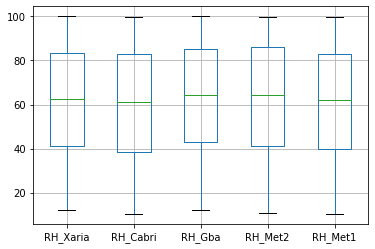

In [424]:
bp_RH = data.boxplot(column=['RH_Xaria', 'RH_Cabri', 'RH_Gba', 'RH_Met2', 'RH_Met1'])  

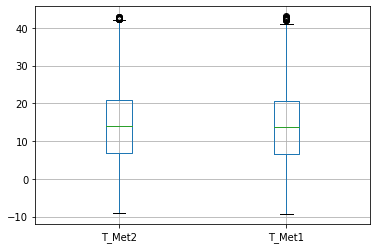

In [425]:
bp_T = data.boxplot(column=['T_Met2', 'T_Met1'])  

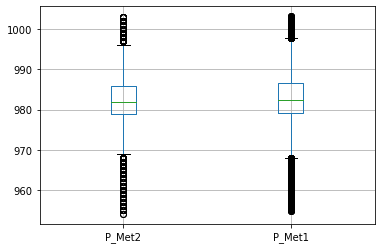

In [426]:
bp_P = data.boxplot(column=['P_Met2', 'P_Met1'])  

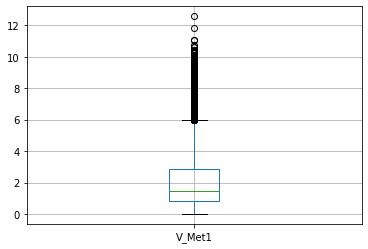

In [427]:
bp_V = data.boxplot(column=['V_Met1'])  

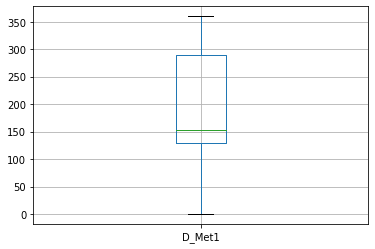

In [428]:
bp_D = data.boxplot(column=[ 'D_Met1'])  

Comme on a montré avant, les boxplots que les variables 'P_Met2', 'V_Met1', 'P_Met1' contient des valeurs abberantes. Nous observons que les medianes des diffèrentes RH sont entre 60% et 65%, ainsi qu'elles ont presque le mème minimum et la mème valeur maximale.    

## Variables evolution

Les figures suivantes montrent l'évolution de chaque variable pendant un an "2019", sachant qu'il ya des valeurs manquantes et abberantes qui sont supprimées. 

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object)

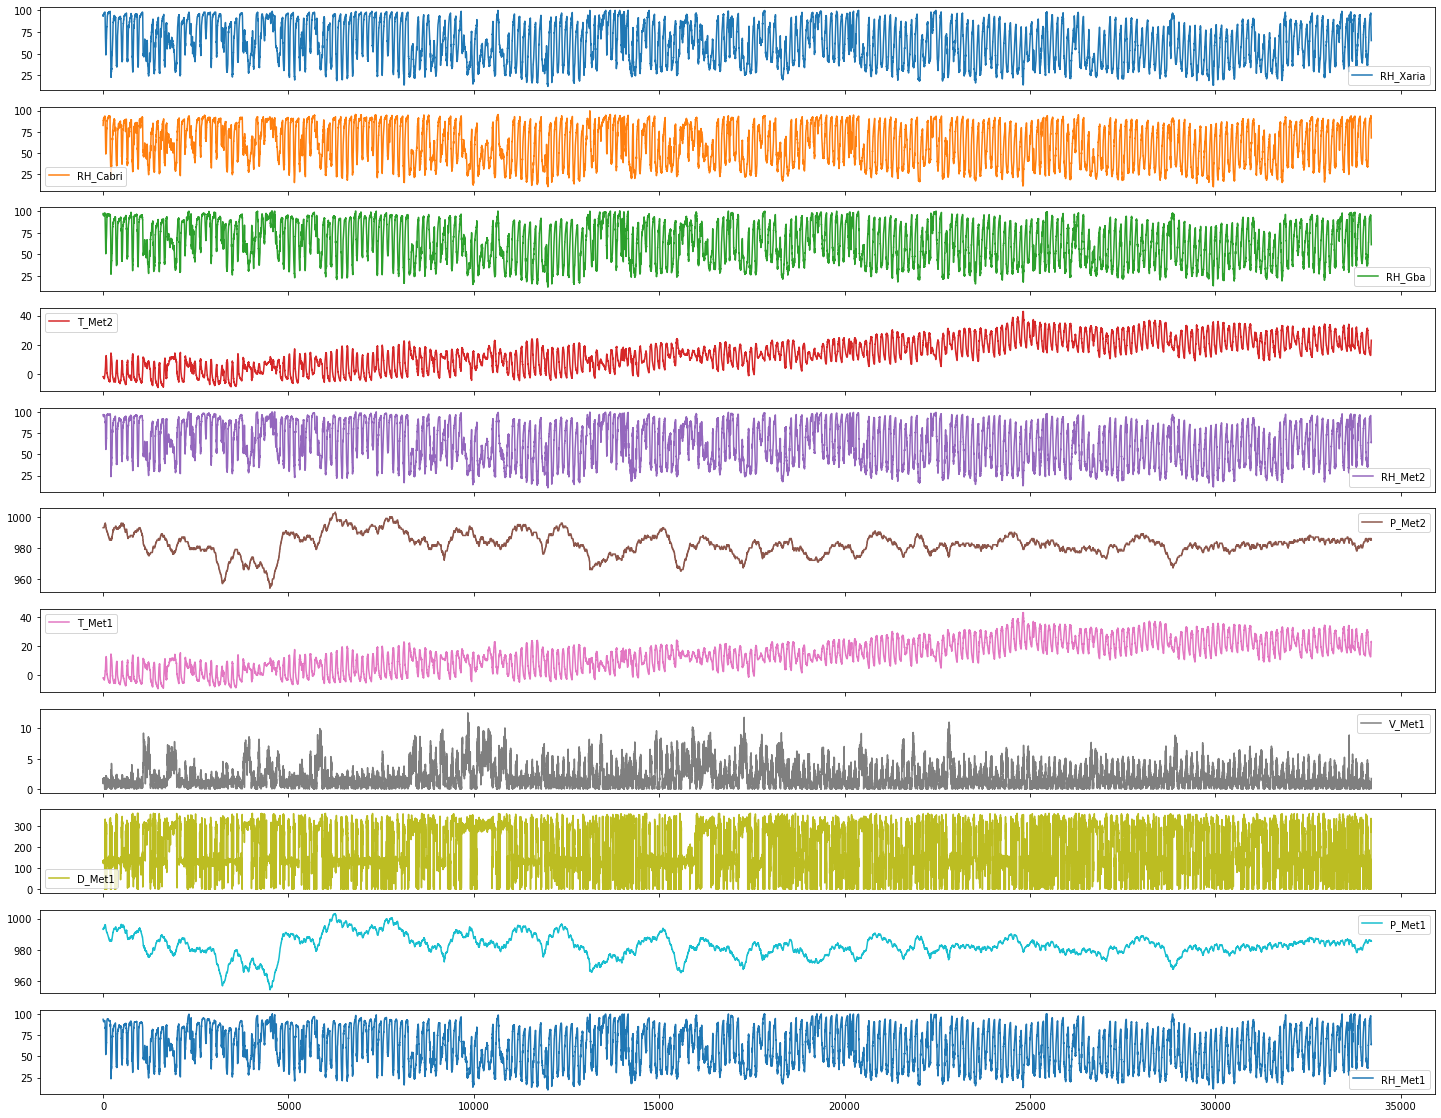

In [429]:
data.plot(subplots=True, figsize=(25,20))

Ci-dessous l'evolution des variables pendant le premier mois de 2019.

In [430]:
df=data[1:4600]

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object)

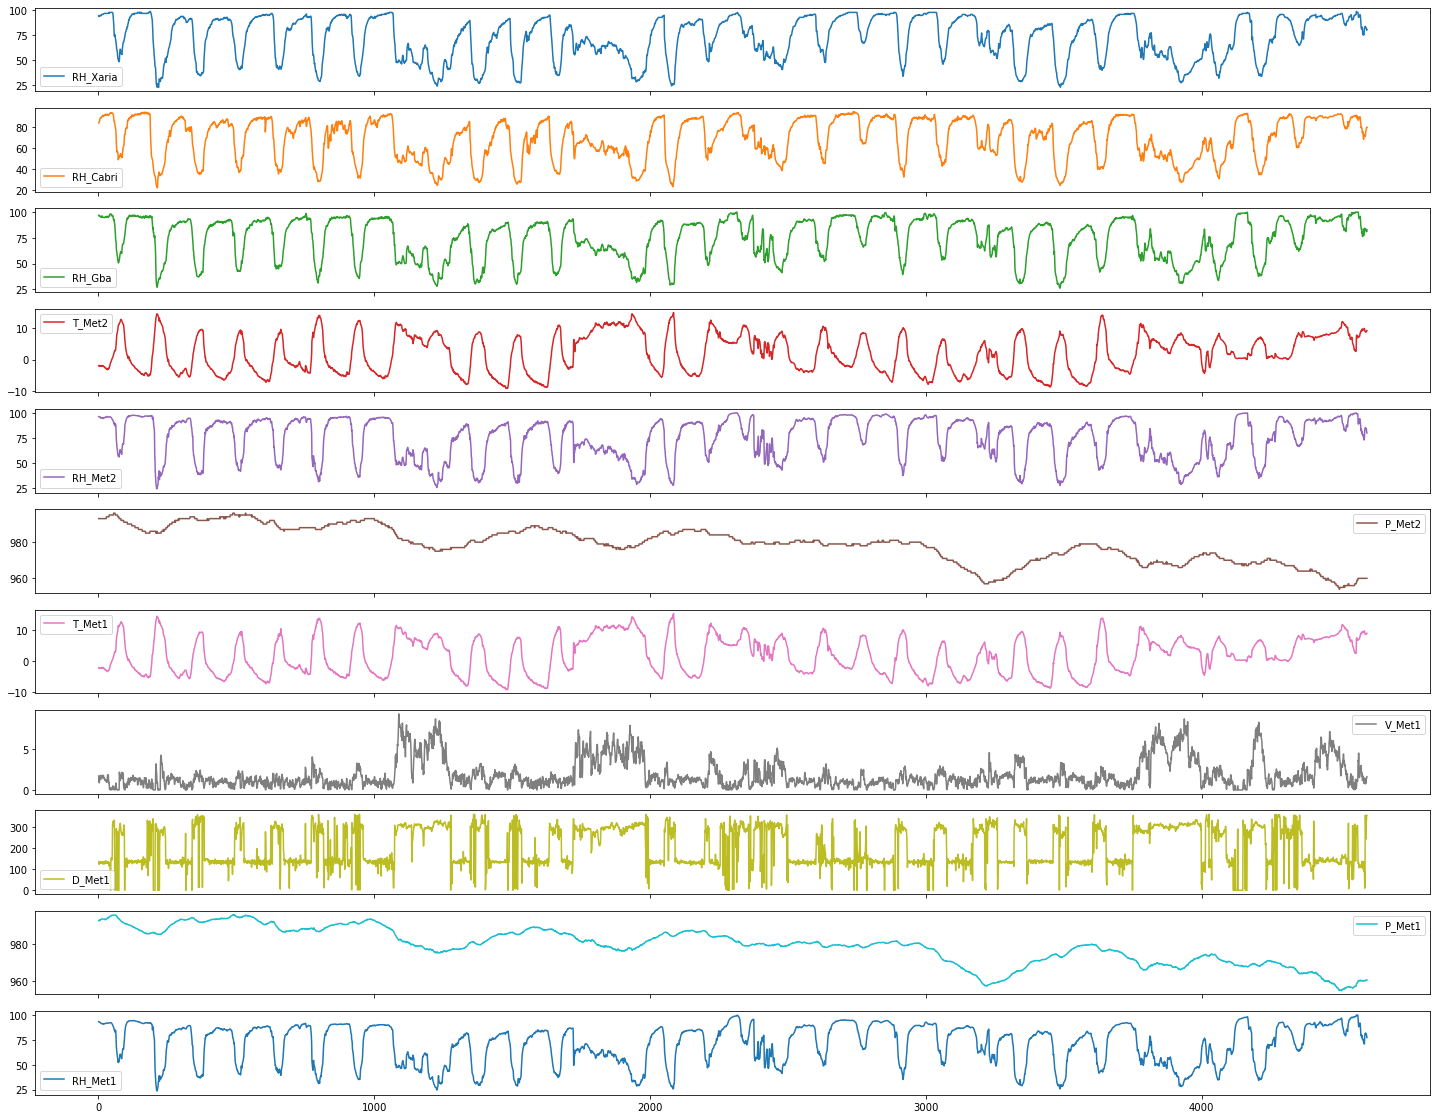

In [431]:
df.plot(subplots=True, figsize=(25,20))

Ces figures montrent bien la similitude entre les valeurs de l'humidité relative sur les quatres stations, ce qui est normal en raison de leur proximité. 

## Histograms

array([[<AxesSubplot:title={'center':'RH_Xaria'}>,
        <AxesSubplot:title={'center':'RH_Cabri'}>,
        <AxesSubplot:title={'center':'RH_Gba'}>],
       [<AxesSubplot:title={'center':'T_Met2'}>,
        <AxesSubplot:title={'center':'RH_Met2'}>,
        <AxesSubplot:title={'center':'P_Met2'}>],
       [<AxesSubplot:title={'center':'T_Met1'}>,
        <AxesSubplot:title={'center':'V_Met1'}>,
        <AxesSubplot:title={'center':'D_Met1'}>],
       [<AxesSubplot:title={'center':'P_Met1'}>,
        <AxesSubplot:title={'center':'RH_Met1'}>, <AxesSubplot:>]],
      dtype=object)

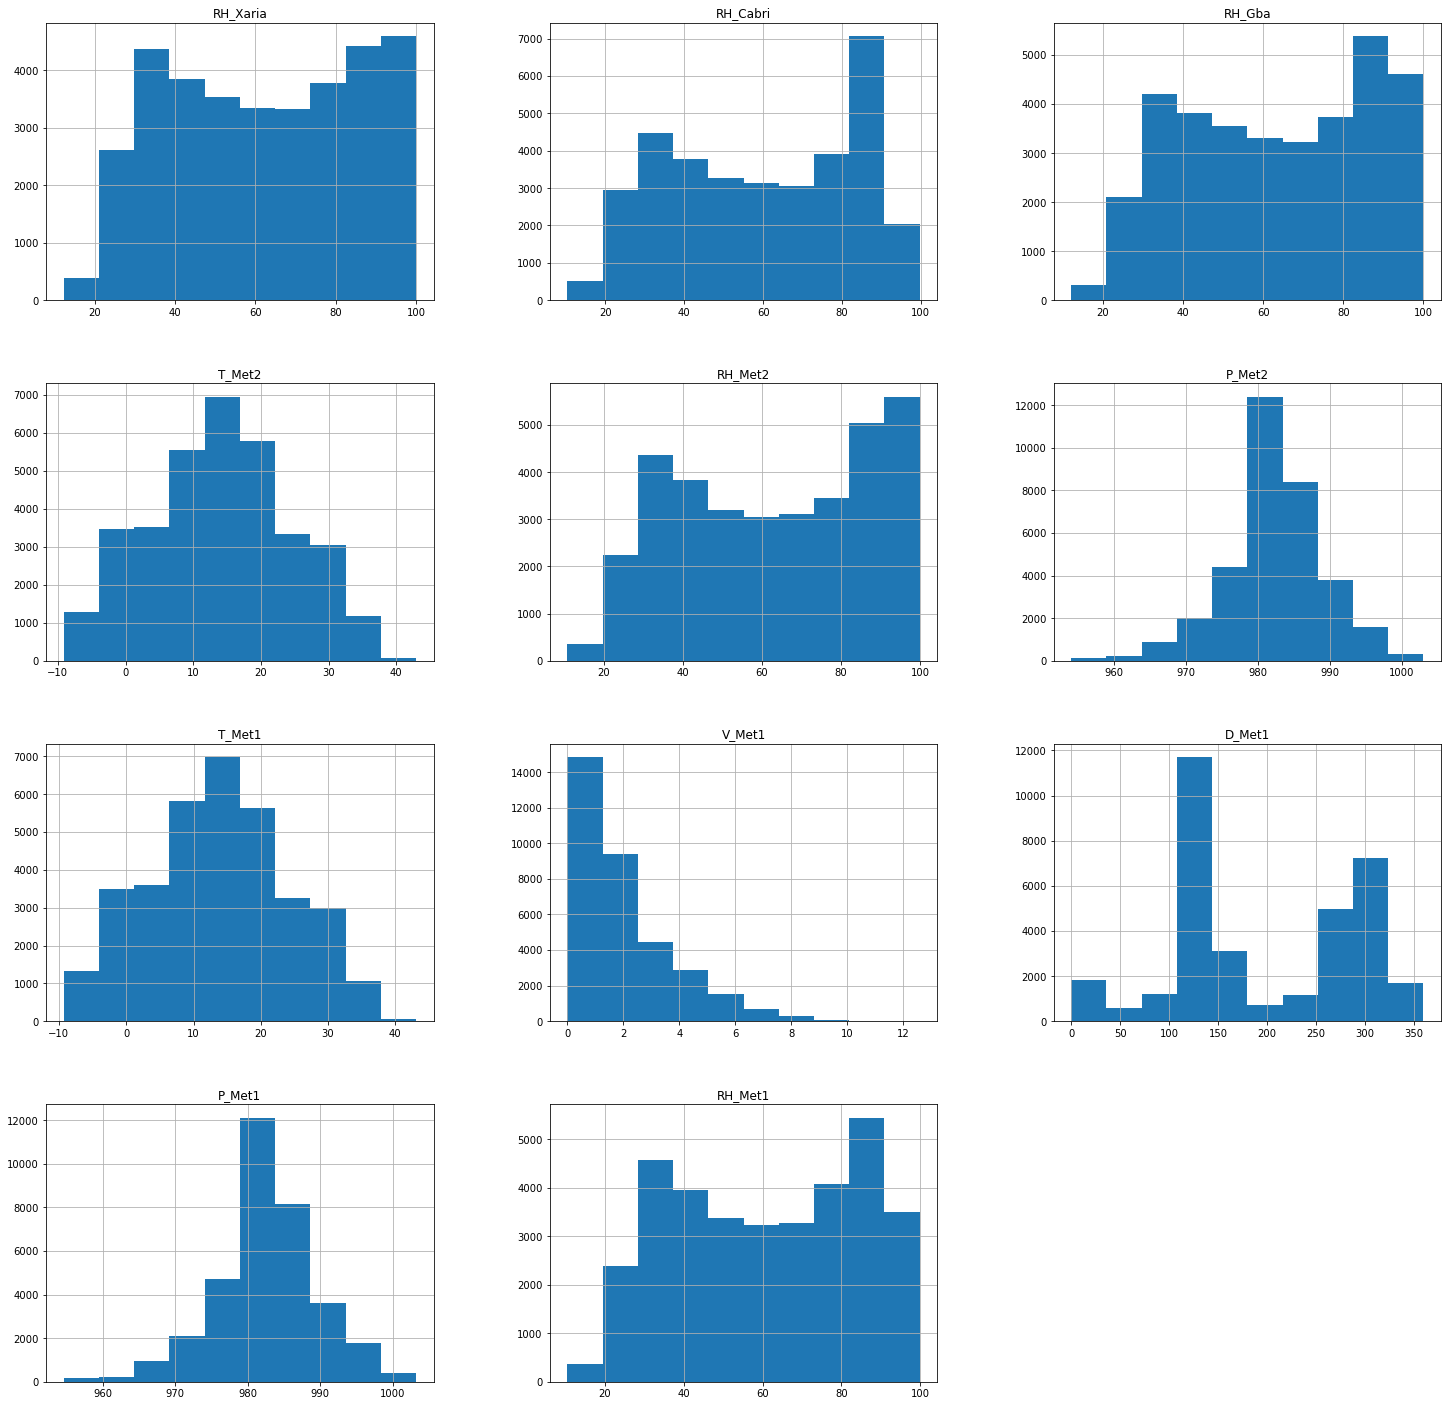

In [432]:
data.hist(bins=10,figsize=(25,25))

## Distribution

Statistiques générales pour voir si les données ont une distribution normale.

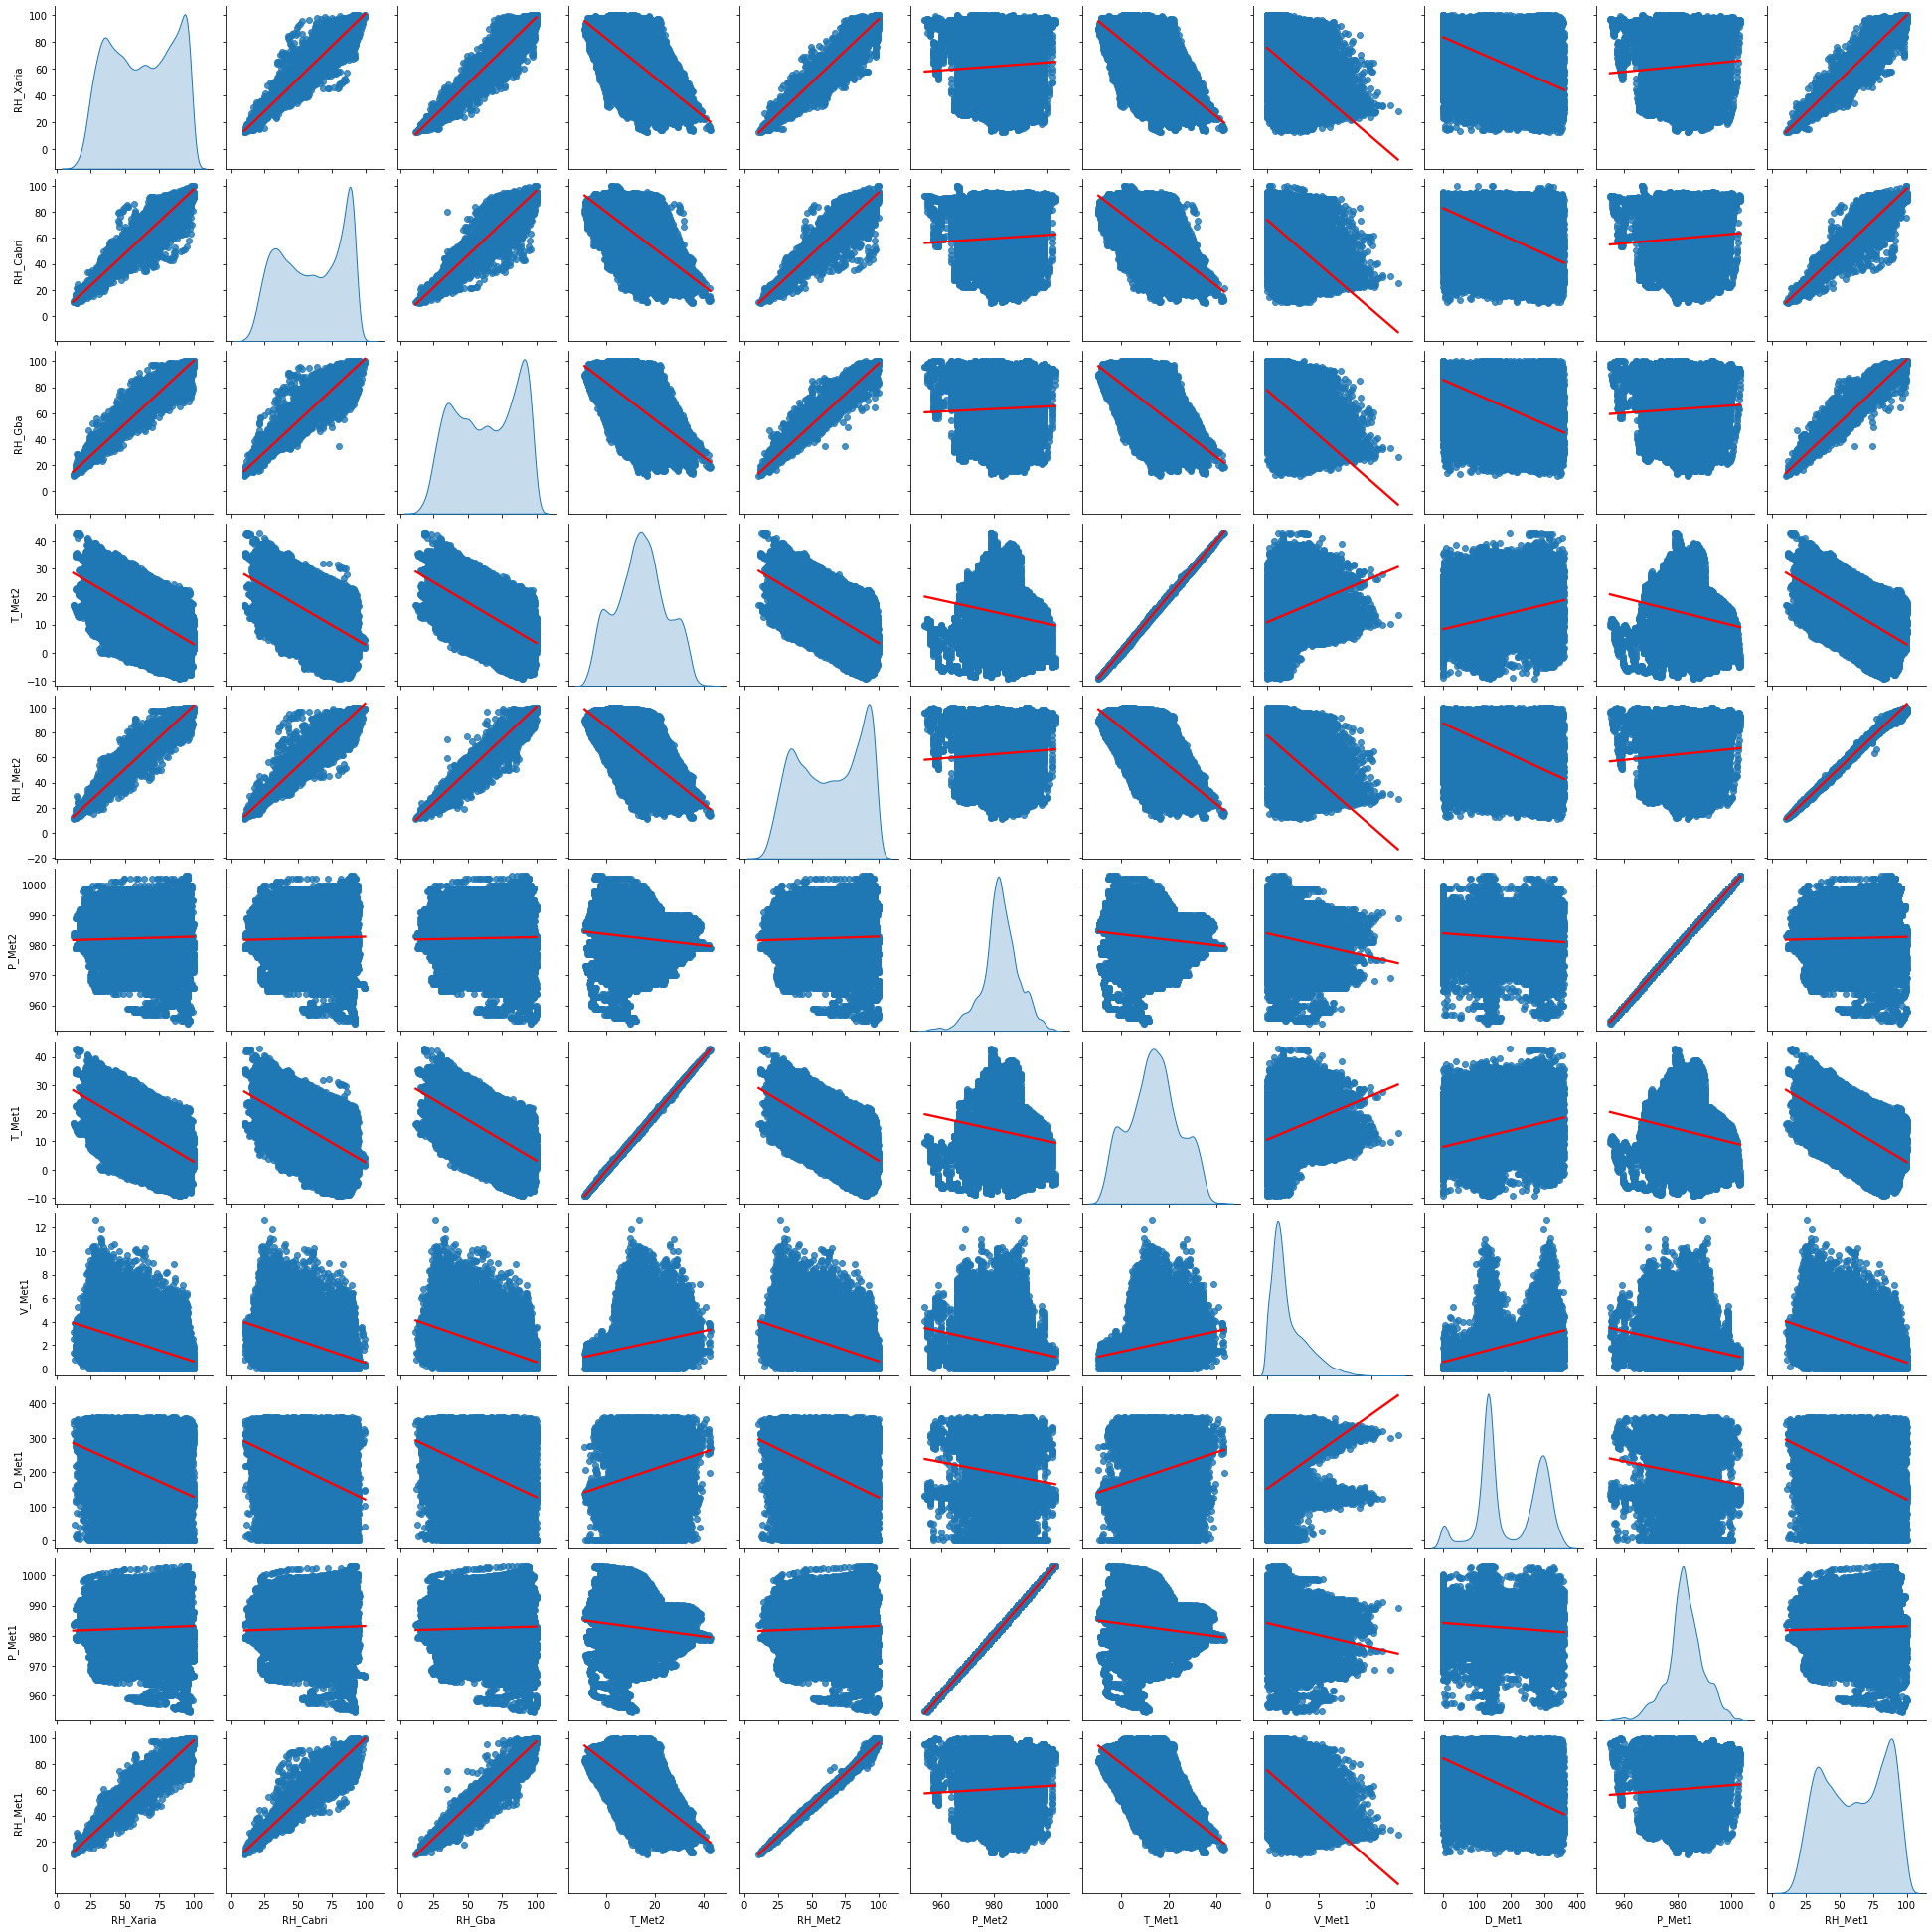

In [150]:
sns.pairplot(data,kind='reg', diag_kind='kde',plot_kws={'line_kws':{'color':'red'}})

Ces variables d'entrée numériques n'ont pas une distribution très asymétrique ou non standard. Parfois, ce problème est dû à des valeurs aberrantes dans les données, des distributions multimodales ou des distributions hautement exponentielles, etc.
Globalement elles sont normalement distribuées.

## Correlation matrix

Visualisation de la matrice de corrélation

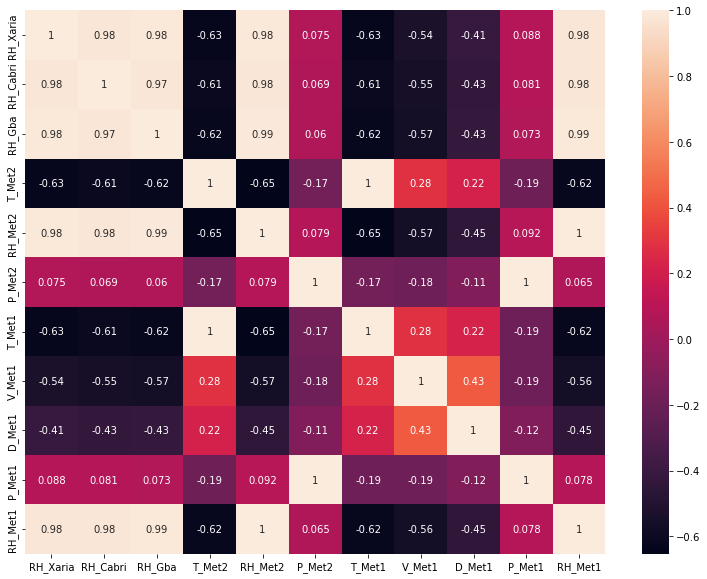

In [443]:
corr_df = data.corr(method='spearman')

plt.figure(figsize=(13, 10))
sns.heatmap(corr_df, annot=True)
plt.show()

Toutes les variables sont globalement fortement corrélées avec RH_Met1 (les RH positivement, et les T au sens négatif), sauf V_Met1, P_Met1, P_Met2, D_Met1.

In [ ]:
#df=df_RH_met1['RH_Met2'][1:4600]
#df.plot(subplots=True, figsize=(15,3))

In [ ]:
#df_met1_RHp['Dates'] = pd.to_datetime(df_met1_RHp['Dates'], format="%d/%m/%Y %H:%M")
#df_met1_RHd.loc[df_met1_RH['Dates']=='#"TIMESTAMP"'].index
#df1=df_RH_met1
#df1 = df1.drop(df1.columns[[4, 5, 6,7,8,9,10]], axis=1)
#prof=ProfileReport(df_RH_met1)
#prof.to_file(output_file='PR_RH')

## Normalization vs Standardization

Modèle avec Normalisation vs Modèle avec Standardisation, lequel est le meilleur pour nos données ?

In [168]:
class PIPELINEGRIDSEARCH():

    def __init__(self) -> None:
        pass

    def split(self, Label_Name, fix_random_state=14, shuffle=True):

        # Set variables for the targets and features
        y = data[Label_Name]
        X = data.iloc[:, 1:-1]
        # Split the data into training test sets
        X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=fix_random_state,shuffle = shuffle)

        return X_train, X_test, y_train, y_test 

    def PipelineGridSearch(self,dict={"Model1":{'scl': StandardScaler(),'GBR': GradientBoostingRegressor()},
                        "Model2":{'scl': StandardScaler(), 'LRR':LinearRegression()},
                        "Model3":{'scl': StandardScaler(), 'DTR':DecisionTreeRegressor(random_state=42)},
                        "Model4":{'scl': StandardScaler(), 'SVR': SVR()},
                        "Model5":{'scl': StandardScaler(), 'LSO': Lasso(random_state=42)},
                        "Model6":{'scl': StandardScaler(), 'RDE':  Ridge(random_state=42)},
                        "Model7":{'scl': StandardScaler(),"ENET":ElasticNet(random_state=42)},
                        "Model8":{'mms': MinMaxScaler(),'GBR': GradientBoostingRegressor()},
                        "Model9":{'mms': MinMaxScaler(), 'LRR':LinearRegression()},
                        "Model10":{'mms': MinMaxScaler(), 'DTR':DecisionTreeRegressor(random_state=42)},
                        "Model11":{'mms': MinMaxScaler(), 'SVR': SVR()},
                        "Model12":{'mms': MinMaxScaler(), 'LSO': Lasso(random_state=42)},
                        "Model13":{'mms': MinMaxScaler(), 'RDE':  Ridge(random_state=42)},
                        "Model14":{'mms': MinMaxScaler(),"ENET":ElasticNet(random_state=42)}},grid_dict = {1: 'Gradient Boosting Regressor scl', 
                        2: 'Linear Regression scl', 3: 'Decision Tree Regressor scl', 4: 'Support Vector Regressor scl', 
                        5: 'Lasso scl', 6: 'Ridge scl',7:'Elastic Net scl',8: 'Gradient Boosting Regressor mms', 
                        9: 'Linear Regression mms', 10: 'Decision Tree Regressor mms', 11: 'Support Vector Regressor mms', 
                        12: 'Lasso mms', 13: 'Ridge mms', 14:'Elastic Net mms',},Label_Name="RH_Met1"):

        pipe_1 = Pipeline(list(dict["Model1"].items()))
        pipe_2 = Pipeline(list(dict["Model2"].items()))
        pipe_3= Pipeline(list(dict["Model3"].items()))
        pipe_4= Pipeline(list(dict["Model4"].items()))
        pipe_5= Pipeline(list(dict["Model5"].items()))
        pipe_6= Pipeline(list(dict["Model6"].items()))
        pipe_7= Pipeline(list(dict["Model7"].items()))
        pipe_8= Pipeline(list(dict["Model8"].items()))
        pipe_9= Pipeline(list(dict["Model9"].items()))
        pipe_10= Pipeline(list(dict["Model10"].items()))
        pipe_11= Pipeline(list(dict["Model11"].items()))
        pipe_12= Pipeline(list(dict["Model12"].items()))
        pipe_13= Pipeline(list(dict["Model13"].items()))
        pipe_14= Pipeline(list(dict["Model14"].items()))
     
        param_range = [1, 2, 3, 4, 5, 6],
        param_range_fl = [1.0, 0.5, 0.1],
        alpha=[0.1,0.2,0.5,0.3],
        C=[1.0, 0.5, 0.1],
        gamma=[1e-7, 1e-4],
        epsilon=[0.1,0.2,0.5,0.3]
        
      
        Model1_param_grid = [{'GBR__learning_rate': [0.01,0.02,0.03,0.04],
                  'GBR__subsample'    : [0.9, 0.5, 0.2, 0.1],
                  'GBR__n_estimators' : [100,500,1000, 1500],
                  'GBR__max_depth'    : [4,6,8,10]
                 }]

        Model2_param_grid=[{'LRR__fit_intercept':[True,False], 
                        'LRR__normalize':[True,False], 'LRR__copy_X':[True, False]}]  

        Model3_param_grid = [{"DTR__criterion": ["mse", "mae"],
                        "DTR__min_samples_split": [10, 20, 40],
                        "DTR__max_depth": [2, 6, 8],
                        "DTR__min_samples_leaf": [20, 40, 100],
                        "DTR__max_leaf_nodes": [5, 20, 100],
                        }]  

        Model4_param_grid = [{'SVR__kernel': ('linear', 'rbf','poly'), 'SVR__C':C,
                         'SVR__gamma': gamma,'SVR__epsilon':epsilon}]
        
        Model5_param_grid = [{'LSO__alpha':alpha}]
        
        Model6_param_grid = [{'RDE__alpha':alpha}]

        Model7_param_grid = [{'ENET__alpha':alpha}]
        

        Model1_grid_search = GridSearchCV(estimator=pipe_1,
        param_grid=Model1_param_grid,
        scoring='accuracy',
        cv=3)

        Model2_grid_search = GridSearchCV(estimator=pipe_2,
        param_grid=Model2_param_grid,
        scoring='accuracy',
        cv=3)

        Model3_grid_search = GridSearchCV(estimator=pipe_3,
        param_grid=Model3_param_grid,
        scoring='accuracy',
        cv=3)

        Model4_grid_search = GridSearchCV(estimator=pipe_4,
        param_grid=Model4_param_grid,
        scoring='accuracy',
        cv=3)

        Model5_grid_search = GridSearchCV(estimator=pipe_5,
        param_grid=Model5_param_grid,
        scoring='accuracy',
        cv=3)

        Model6_grid_search = GridSearchCV(estimator=pipe_6,
        param_grid=Model6_param_grid ,
        scoring='accuracy',
        cv=3)

        Model7_grid_search = GridSearchCV(estimator=pipe_7,
        param_grid=Model7_param_grid,
        scoring='accuracy',
        cv=3)

        # Model with min max scaler hyperparameters finetuning
        Model8_grid_search = GridSearchCV(estimator=pipe_8,
        param_grid=Model1_param_grid,
        scoring='accuracy',
        cv=3)

        Model9_grid_search = GridSearchCV(estimator=pipe_9,
        param_grid=Model2_param_grid,
        scoring='accuracy',
        cv=3)

        Model10_grid_search = GridSearchCV(estimator=pipe_10,
        param_grid=Model3_param_grid,
        scoring='accuracy',
        cv=3)

        Model11_grid_search = GridSearchCV(estimator=pipe_11,
        param_grid=Model4_param_grid,
        scoring='accuracy',
        cv=3)

        Model12_grid_search = GridSearchCV(estimator=pipe_12,
        param_grid=Model5_param_grid,
        scoring='accuracy',
        cv=3)

        Model13_grid_search = GridSearchCV(estimator=pipe_13,
        param_grid=Model6_param_grid ,
        scoring='accuracy',
        cv=3)

        Model14_grid_search = GridSearchCV(estimator=pipe_14,
        param_grid=Model7_param_grid,
        scoring='accuracy',
        cv=3)

        grids = [Model1_grid_search, Model2_grid_search, Model3_grid_search, Model4_grid_search, Model5_grid_search, Model6_grid_search, Model7_grid_search]
        X_train, X_test, y_train, y_test  = self.split(Label_Name)
        for pipe in grids:
            pipe.fit(X_train,y_train)

        for i, model in enumerate(grids):
            print('{} Test Accuracy: {}'.format(grid_dict[i],
            model.score(X_test,y_test)))
            print('{} Best Params: {}'.format(grid_dict[i], model.best_params_))


       



In [ ]:
#parser=PIPELINEGRIDSEARCH()
#parser.PipelineGridSearch()

In [11]:
df_RH_met1 = data

## Features selection

Dans cette étapes de notre étude, nous voulons voir quelle est la meilleure combinaison entre les variables (caractéristiques) qui donne une meilleure performance de notre modèle.    


La stratégie suivie pour le choix des variables prédictives les plus importantes pour augmenter la performance de notre modèle consiste à :

*Etudier les corrélations entre la variable cible et chaque variable d'entrée.


*Commencer par entrainer et évaluer le modèle en fonction de chaque variable séparément. Puis en utilisant deux variables, puis trois... jusqu'à atteindre la meilleure qualité après avoir évalué toutes les combinaisons des variables prédictives.


Remarques :
    
    1. Notre but est atteindre la meilleure performance.
    
    2. Notre but est utiliser le moindre possible nombre des variables, car dans un contexte méteorologique, utiliser plusieurs variables peut conduire à plus d erreurs et biais.
    
    3. Les combinaisons qui sont pas basées sur les RH des quatres stations sont pas testées (il est évident d avoir des mauvaises performances dans le cas contraire, voir la matrice de corrélation). 
    
    4. Si vous voulez testez un modèle, choisissez et implémentez une seule combinaison parmi les suivantes. 
    
    5. La dérnière combinaison  " RH_Xaria + RH_Cabri + RH_Gba + RH_Met2 + T_Met2 + T_Met1 + V_Met1 + P_Met1 " conduit à la meilleure performance.
    
    6. Une phase d’amélioration de performance et d’exploration d’autres approches.

### Model input : RH_Xaria

In [304]:
x, y = df_RH_met1.iloc[:, [0]], df_RH_met1.iloc[:, [-1]]

### Model input : RH_Cabri

In [160]:
x, y = df_RH_met1.iloc[:, [1]], df_RH_met1.iloc[:, [-1]]

### Model input : RH_Gba

In [95]:
x, y = df_RH_met1.iloc[:, [2]], df_RH_met1.iloc[:, [-1]]

### Model input : RH_Met2

In [162]:
x, y = df_RH_met1.iloc[:, [4]], df_RH_met1.iloc[:, [-1]]

### Model input : RH_Xaria + RH_Cabri

In [29]:
x, y = df_RH_met1.iloc[:, [0,1]], df_RH_met1.iloc[:, [-1]]

### Model input : RH_Xaria + RH_Gba

In [164]:
x, y = df_RH_met1.iloc[:, [0,2]], df_RH_met1.iloc[:, [-1]]

### Model input : RH_Xaria + RH_Met2

In [165]:
x, y = df_RH_met1.iloc[:, [0,4]], df_RH_met1.iloc[:, [-1]]

### Model input : RH_Cabri + RH_Gba

In [166]:
x, y = df_RH_met1.iloc[:, [1,2]], df_RH_met1.iloc[:, [-1]]

### Model input : RH_Cabri + RH_Met2

In [167]:
x, y = df_RH_met1.iloc[:, [1,4]], df_RH_met1.iloc[:, [-1]]

### Model input : RH_Gba + RH_Met2

In [168]:
x, y = df_RH_met1.iloc[:, [2,4]], df_RH_met1.iloc[:, [-1]]

### Model input : RH_Xaria + RH_Cabri + RH_Gba

In [325]:
x, y = df_RH_met1.iloc[:, [0,1,2]], df_RH_met1.iloc[:, [-1]]

### Model input : RH_Xaria + RH_Cabri + RH_Met2

In [332]:
x, y = df_RH_met1.iloc[:, [0,1,4]], df_RH_met1.iloc[:, [-1]]

### Model input : RH_Cabri + RH_Gba + RH_Met2

In [171]:
x, y = df_RH_met1.iloc[:, [1,2,4]], df_RH_met1.iloc[:, [-1]]

### Model input : RH_Xaria + RH_Gba + RH_Met2

In [324]:
x, y = df_RH_met1.iloc[:, [0,2,4]], df_RH_met1.iloc[:, [-1]]

### Model input : RH_Xaria + RH_Cabri + RH_Gba + RH_Met2 

In [73]:
x, y = df_RH_met1.iloc[:, [0,1,2,4]], df_RH_met1.iloc[:, [-1]]

### Model input : RH_Xaria + RH_Cabri + RH_Gba + RH_Met2 + T_Met2

In [174]:
x, y = df_RH_met1.iloc[:, [0,1,2,3,4]], df_RH_met1.iloc[:, [-1]]

### Model input : RH_Xaria + RH_Cabri + RH_Gba + RH_Met2 + T_Met1

In [175]:
x, y = df_RH_met1.iloc[:, [0,1,2,4,6]], df_RH_met1.iloc[:, [-1]]

### Model input : RH_Xaria + RH_Cabri + RH_Gba + RH_Met2 + V_Met1

In [176]:
x, y = df_RH_met1.iloc[:, [0,1,2,4,7]], df_RH_met1.iloc[:, [-1]]

### Model input : RH_Xaria + RH_Cabri + RH_Gba + RH_Met2 + P_Met1

In [177]:
x, y = df_RH_met1.iloc[:, [0,1,2,4,9]], df_RH_met1.iloc[:, [-1]]

### Model input : RH_Xaria + RH_Cabri + RH_Gba + RH_Met2 + T_Met2 + T_Met1

In [178]:
x, y = df_RH_met1.iloc[:, [0,1,2,3,4,6]], df_RH_met1.iloc[:, [-1]]

### Model input : RH_Xaria + RH_Cabri + RH_Gba + RH_Met2 + T_Met2 + V_Met1

In [179]:
x, y = df_RH_met1.iloc[:, [0,1,2,3,4,7]], df_RH_met1.iloc[:, [-1]]

### Model input : RH_Xaria + RH_Cabri + RH_Gba + RH_Met2 + T_Met2 + P_Met1

In [180]:
x, y = df_RH_met1.iloc[:, [0,1,2,3,4,9]], df_RH_met1.iloc[:, [-1]]

### Model input : RH_Xaria + RH_Cabri + RH_Gba + RH_Met2 + T_Met1 + V_Met1

In [181]:
x, y = df_RH_met1.iloc[:, [0,1,2,4,6,7]], df_RH_met1.iloc[:, [-1]]

### Model input : RH_Xaria + RH_Cabri + RH_Gba + RH_Met2 + T_Met1 + P_Met1

In [17]:
x, y = df_RH_met1.iloc[:, [0,1,2,4,6,9]], df_RH_met1.iloc[:, [-1]]

### Model input : RH_Xaria + RH_Cabri + RH_Gba + RH_Met2 + V_Met1 + P_Met1

In [183]:
x, y = df_RH_met1.iloc[:, [0,1,2,4,7,9]], df_RH_met1.iloc[:, [-1]]

### Model input : RH_Xaria + RH_Cabri + RH_Gba + RH_Met2 + T_Met2 + T_Met1 + V_Met1

In [340]:
x, y = df_RH_met1.iloc[:, [0,1,2,3,4,6,7]], df_RH_met1.iloc[:, [-1]]

### Model input : RH_Xaria + RH_Cabri + RH_Gba + RH_Met2 + T_Met2 + T_Met1 + P_Met1

In [185]:
x, y = df_RH_met1.iloc[:, [0,1,2,3,4,6,9]], df_RH_met1.iloc[:, [-1]]

### Model input : RH_Xaria + RH_Cabri + RH_Gba + RH_Met2 + T_Met2 + V_Met1 + P_Met1

In [186]:
x, y = df_RH_met1.iloc[:, [0,1,2,3,4,7,9]], df_RH_met1.iloc[:, [-1]]

### Model input : RH_Xaria + RH_Cabri + RH_Gba + RH_Met2 + T_Met1 + V_Met1 + P_Met1

In [187]:
x, y = df_RH_met1.iloc[:, [0,1,2,4,6,7,9]], df_RH_met1.iloc[:, [-1]]

### Model input : RH_Xaria + RH_Cabri + RH_Gba + RH_Met2 + T_Met2 + T_Met1 + V_Met1 + P_Met1

In [12]:
x, y = df_RH_met1.iloc[:, [0,1,2,3,4,6,7,9]], df_RH_met1.iloc[:, [-1]]

## Data Split

Le data set final obtenu contient 34210 lignes divisé en trois sous data sets, d'entrainement (60%), de validation (20%) et de test (20%). 

In [13]:
# set aside 20% of train and test data for evaluation
X_train, X_test, y_train, y_test = train_test_split(x, y,
    test_size=0.2, shuffle = True, random_state = 8)

# Use the same function above for the validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, 
    test_size=0.25, random_state= 8) # 0.25 x 0.8 = 0.2


print("X_train shape: {}".format(X_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_train shape: {}".format(y_train.shape))
print("y_test shape: {}".format(y_test.shape))
print("X_val shape: {}".format(X_val.shape))
print("y_val shape: {}".format(y_val.shape))

X_train shape: (20526, 8)
X_test shape: (6842, 8)
y_train shape: (20526, 1)
y_test shape: (6842, 1)
X_val shape: (6842, 8)
y_val shape: (6842, 1)


In [14]:
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(X_train)
val_scaled = scaler.transform(X_val)
test_scaled = scaler.transform(X_test)

train_scaled, y_train = np.array(train_scaled), np.array(y_train)
test_scaled,  y_test  = np.array(test_scaled),  np.array(y_test)
val_scaled,  y_val  = np.array(val_scaled),  np.array(y_val)

# LinearRegression

In [21]:
model1=LinearRegression(fit_intercept=True, normalize=False, copy_X=True)

In [22]:
model1.fit(X_train,y_train)

C:\Users\AL799775\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(


LinearRegression(normalize=False)

In [23]:
prediction = model1.predict(X_val)

In [193]:
print('Variance score: %.2f' % model1.score(X_val, y_val))
print("Mean absolute error: %.2f" % np.mean(np.absolute(prediction - y_val)))
print("Residual sum of squares (MSE): %.2f" % np.mean((prediction - y_val) ** 2))
print("R2-score: %.2f" % r2_score(y_val,prediction ) )

Variance score: 1.00
Mean absolute error: 0.72
Residual sum of squares (MSE): 1.03
R2-score: 1.00


C:\Users\AL799775\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


# Ridge

In [53]:
model2 = Ridge(alpha = 0.5,copy_X = True, fit_intercept = True, max_iter = 1000,normalize = False)

In [61]:
model2.fit(X_train,y_train)

C:\Users\AL799775\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
C:\Users\AL799775\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BayesianRidge(normalize=False)

In [62]:
prediction = model2.predict(X_val)

In [63]:
prediction=prediction.reshape(6842,1)

In [64]:
print('Variance score: %.2f' % model2.score(X_val, y_val))
print("Mean absolute error: %.2f" % np.mean(np.absolute(prediction - y_val)))
print("Residual sum of squares (MSE): %.2f" % np.mean((prediction - y_val) ** 2))
print("R2-score: %.2f" % r2_score(y_val,prediction ) )

Variance score: 1.00
Mean absolute error: 0.72
Residual sum of squares (MSE): 1.04
R2-score: 1.00


C:\Users\AL799775\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


# Lasso

In [38]:
model3=Lasso(alpha = 0.5, copy_X = True, fit_intercept = True, max_iter = 1000,
   normalize = False, positive = False, precompute = False, random_state = None,
   selection = 'cyclic', tol = 0.0001, warm_start = False)

In [39]:
model3.fit(X_train,y_train)

C:\Users\AL799775\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(


Lasso(alpha=0.5, normalize=False)

In [40]:
prediction = model3.predict(X_val)

In [41]:
prediction=prediction.reshape(6842,1)

In [42]:
print('Variance score: %.2f' % model3.score(X_val, y_val))
print("Mean absolute error: %.2f" % np.mean(np.absolute(prediction - y_val)))
print("Residual sum of squares (MSE): %.2f" % np.mean((prediction - y_val) ** 2))
print("R2-score: %.2f" % r2_score(y_val,prediction ) )

Variance score: 1.00
Mean absolute error: 0.75
Residual sum of squares (MSE): 1.17
R2-score: 1.00


C:\Users\AL799775\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


# BayesianRidge

In [276]:
model4 = BayesianRidge(alpha_1 = 1e-06, alpha_2 = 1e-06, compute_score = False, copy_X = True,
   fit_intercept = True, lambda_1 = 1e-06, lambda_2 = 1e-06, n_iter = 300,
   normalize = False, tol=0.001, verbose = False)

In [277]:
model4.fit(X_train,y_train)

C:\Users\AL799775\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
C:\Users\AL799775\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BayesianRidge(normalize=False)

In [278]:
prediction = model4.predict(X_val)

In [279]:
prediction=prediction.reshape(6842,1)

In [280]:
print('Variance score: %.2f' % model4.score(X_val, y_val))
print("Mean absolute error: %.2f" % np.mean(np.absolute(prediction - y_val)))
print("Residual sum of squares (MSE): %.2f" % np.mean((prediction - y_val) ** 2))
print("R2-score: %.2f" % r2_score(y_val,prediction ) )

Variance score: 1.00
Mean absolute error: 0.72
Residual sum of squares (MSE): 1.04
R2-score: 1.00


C:\Users\AL799775\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


# ElasticNet

In [44]:
model5=ElasticNet()

In [45]:
model5.fit(X_train,y_train)

ElasticNet()

In [46]:
prediction = model5.predict(X_val)

In [52]:
X_val.shape[0]

6842

In [53]:
prediction=prediction.reshape(X_val.shape[0],1)

In [54]:
print('Variance score: %.2f' % model5.score(X_val, y_val))
print("Mean absolute error: %.2f" % np.mean(np.absolute(prediction - y_val)))
print("Residual sum of squares (MSE): %.2f" % np.mean((prediction - y_val) ** 2))
print("R2-score: %.2f" % r2_score(y_val,prediction ) )

Variance score: 1.00
Mean absolute error: 0.75
Residual sum of squares (MSE): 1.20
R2-score: 1.00


C:\Users\AL799775\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


# KNeighborsRegressor

In [75]:
model6=KNeighborsRegressor(n_neighbors=5)

In [82]:
model6.fit(X_train,y_train)

C:\Users\AL799775\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


NuSVR(gamma='auto', kernel='linear', nu=0.1)

In [83]:
prediction = model6.predict(X_val)

In [84]:
prediction=prediction.reshape(6842,1)

In [85]:
print('Variance score: %.2f' % model6.score(X_val, y_val))
print("Mean absolute error: %.2f" % np.mean(np.absolute(prediction - y_val)))
print("Residual sum of squares (MSE): %.2f" % np.mean((prediction - y_val) ** 2))
print("R2-score: %.2f" % r2_score(y_val,prediction ) )

Variance score: 1.00
Mean absolute error: 0.77
Residual sum of squares (MSE): 1.08
R2-score: 1.00


C:\Users\AL799775\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


# GradientBoostingRegressor

In [292]:
model7=GradientBoostingRegressor()

In [293]:
model7.fit(X_train,y_train)

C:\Users\AL799775\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor()

In [294]:
prediction = model7.predict(X_val)

In [295]:
prediction=prediction.reshape(6842,1)

In [296]:
print('Variance score: %.2f' % model.score(X_val, y_val))
print("Mean absolute error: %.2f" % np.mean(np.absolute(prediction - y_val)))
print("Residual sum of squares (MSE): %.2f" % np.mean((prediction - y_val) ** 2))
print("R2-score: %.2f" % r2_score(y_val,prediction ) )

Variance score: 1.00
Mean absolute error: 0.51
Residual sum of squares (MSE): 0.55
R2-score: 1.00


C:\Users\AL799775\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


# DecisionTree

In [270]:
model8=DecisionTreeRegressor(random_state=0)

In [271]:
model8.fit(X_train,y_train)

DecisionTreeRegressor(random_state=0)

In [272]:
prediction=model8.predict(X_val)

In [273]:
prediction=prediction.reshape(6842,1)

In [198]:
print('Variance score: %.2f' % model.score(X_val, y_val))
print("Mean absolute error: %.2f" % np.mean(np.absolute(prediction - y_val)))
print("Residual sum of squares (MSE): %.2f" % np.mean((prediction - y_val) ** 2))
print("R2-score: %.2f" % r2_score(y_val,prediction ) )

Variance score: 1.00
Mean absolute error: 0.62
Residual sum of squares (MSE): 0.86
R2-score: 1.00


C:\Users\AL799775\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


# RandomForest

In [15]:
model9=RandomForestRegressor(max_depth=90,random_state=0,n_estimators=100) 

In [20]:
model9.fit(train_scaled,y_train)

C:\Users\AL799775\AppData\Local\Temp\ipykernel_8252\2198721775.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model9.fit(train_scaled,y_train)


RandomForestRegressor(max_depth=90, random_state=0)

In [21]:
prediction=model9.predict(val_scaled)

In [23]:
prediction=prediction.reshape(6842,1)

In [24]:
print('Variance score: %.2f' % model9.score(val_scaled, y_val))
print("Mean absolute error: %.2f" % np.mean(np.absolute(prediction - y_val)))
print("Residual sum of squares (MSE): %.2f" % np.mean((prediction - y_val) ** 2))
print("R2-score: %.2f" % r2_score(y_val,prediction ) )

Variance score: 1.00
Mean absolute error: 0.44
Residual sum of squares (MSE): 0.45
R2-score: 1.00


In [274]:
prediction=prediction.reshape(6842,1)
print('Variance score: %.2f' % model9.score(X_val, y_val))
print("Mean absolute error: %.2f" % np.mean(np.absolute(prediction - y_val)))
print("Residual sum of squares (MSE): %.2f" % np.mean((prediction - y_val) ** 2))
print("R2-score: %.2f" % r2_score(y_val,prediction ) )

Variance score: 1.00
Mean absolute error: 0.44
Residual sum of squares (MSE): 0.45
R2-score: 1.00


C:\Users\AL799775\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [210]:
#sorted(sklearn.metrics.SCORERS.keys())

# SVR

In [280]:
model10 = SVR(kernel = 'rbf')

In [281]:
model10.fit(X_train,y_train)

C:\Users\AL799775\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [282]:
prediction=model10.predict(X_val)

In [283]:
prediction=prediction.reshape(6842,1)

In [226]:
print('Variance score: %.2f' % reg.score(X_val, y_val))
print("Mean absolute error: %.2f" % np.mean(np.absolute(prediction - y_val)))
print("Residual sum of squares (MSE): %.2f" % np.mean((prediction - y_val) ** 2))
print("R2-score: %.2f" % r2_score(y_val,prediction ) )

Variance score: 0.99
Mean absolute error: 1.79
Residual sum of squares (MSE): 6.25
R2-score: 0.99


C:\Users\AL799775\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


# NuSVR

In [ ]:
model11=NuSVR(kernel = 'linear', gamma = 'auto',C = 1.0, nu = 0.1)

In [ ]:
model11.fit(X_train,y_train)

In [ ]:
prediction = model11.predict(X_val)

In [ ]:
prediction=prediction.reshape(6842,1)

In [ ]:
print('Variance score: %.2f' % mode111.score(X_val, y_val))
print("Mean absolute error: %.2f" % np.mean(np.absolute(prediction - y_val)))
print("Residual sum of squares (MSE): %.2f" % np.mean((prediction - y_val) ** 2))
print("R2-score: %.2f" % r2_score(y_val,prediction ) )

# ANN

## Normalization

In [21]:
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(X_train)
val_scaled = scaler.transform(X_val)
test_scaled = scaler.transform(X_test)

train_scaled, y_train = np.array(train_scaled), np.array(y_train)
test_scaled,  y_test  = np.array(test_scaled),  np.array(y_test)
val_scaled,  y_val  = np.array(val_scaled),  np.array(y_val)

## Model

In [ ]:
def DNN1(shape):
  
    model = keras.models.Sequential()
    model.add(keras.layers.Input(shape, name="InputLayer"))
    model.add(keras.layers.Dense(101, activation='relu', name='Dense_n1'))
    model.add(keras.layers.Dense(1, name='Output'))
  
    model.compile(optimizer = 'adam',
                loss      = 'mse',
                metrics   = ['mae', 'mse'] )
    return model

In [25]:
def DNN2(shape):
  
    model = keras.models.Sequential()
    model.add(keras.layers.Input(shape, name="InputLayer"))
    model.add(keras.layers.Dense(300, activation='relu', name='Dense_n1'))
    model.add(keras.layers.Dense(500, activation='relu', name='Dense_n2'))
    model.add(keras.layers.Dense(1, name='Output'))
  
    model.compile(optimizer = keras.optimizers.Adam(learning_rate = 0.001),
                loss      = 'mse',
                metrics   = ['mae', 'mse'] )
    return model

In [174]:
def DNN3(shape):
  
    model = keras.models.Sequential()
    model.add(keras.layers.Input(shape, name="InputLayer"))
    model.add(keras.layers.Dense(30, activation='relu', name='Dense_n1'))
    model.add(keras.layers.Dense(20, activation='relu', name='Dense_n2'))
    model.add(keras.layers.Dense(10, activation='relu', name='Dense_n3'))
    model.add(keras.layers.Dense(1, name='Output'))
  
    model.compile(optimizer = 'adam',
                loss      = 'mse',
                metrics   = ['mae', 'mse'] )
    return model

In [25]:
import sys
import warnings
warnings.filterwarnings(action='ignore',category=FutureWarning)
from keras.callbacks import EarlyStopping
import pandas as pd
import os
from keras.models import load_model
#import urllib
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from keras.models import Model
from tensorflow import keras as kr
from keras.layers import Input,Dense,concatenate,PReLU
from keras.utils.vis_utils import plot_model
import matplotlib.dates as mdates
# function to preprocess input data ( data scaling)
import keras.backend as k
from functools import partial

In [28]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [40]:
def fit_model(trainx,trainy):
        #n=len(trainx)
        input_u=Input(shape=(6,))
        x_u = Dense(66,kernel_initializer='he_normal')(input_u)
        x_u=PReLU(alpha_initializer='he_normal', alpha_regularizer=None, alpha_constraint=None, shared_axes=None)(x_u)
        x_vv = Dense(46,kernel_initializer='he_normal')(x_u)
        x_vv=PReLU(alpha_initializer='he_normal', alpha_regularizer=None, alpha_constraint=None, shared_axes=None)(x_vv)
        
        x_vy = Dense(4,kernel_initializer='he_normal')(x_vv)
        x_vy=PReLU(alpha_initializer='he_normal', alpha_regularizer=None, alpha_constraint=None, shared_axes=None)(x_vy)
        pred_u = Dense(1, activation="linear",name='u')(x_vy)
        #pred_v = Dense(1, activation="linear",name='v')(x_v)
        usualCallback = EarlyStopping(monitor='loss', min_delta=0.0005, patience = 10)
        #usualCallback = [EarlyStopping(monitor='loss',patience = 10),ModelCheckpoint(filepath='CEA_ANNFD_WLW.h5',monitor='loss',save_best_only=True)]
        #wind_output=[pred_u,pred_v]
            #creating the model objectMo
        model=Model(inputs=input_u,outputs=pred_u)
        
        #plotting the structure of the model
        plot_model(model,to_file="cea_ann.png",show_shapes="True")
        
        #compiling the model
        model.compile(optimizer = tf.keras.optimizers.legacy.Nadam(lr=0.0005, beta_1=0.9, beta_2=0.999, epsilon=1e-7, decay=20),
                loss      = 'mse',
                metrics   = 'mae' )
        
    
    #training the model
        model.fit(trainx,trainy,epochs=1000,batch_size=64,callbacks=[usualCallback],validation_data = (X_val, y_val))
        prediction=model.predict(val_scaled)
        print("Mean absolute error: %.2f" % np.mean(np.absolute(prediction - y_val)))
        print("Residual sum of squares (MSE): %.2f" % np.mean((prediction - y_val) ** 2))
        print("R2-score: %.2f" % r2_score(y_val,prediction ) )


In [41]:
fit_model(train_scaled, y_train)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
Epoch 1/1000


C:\Users\AL799775\Anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\nadam.py:89: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


321/321 [==============================] - 1s 1ms/step - loss: 1027.8092 - mae: 21.3514 - val_loss: 301378400.0000 - val_mae: 17329.3262
Epoch 2/1000
321/321 [==============================] - 0s 1ms/step - loss: 9.2141 - mae: 2.2164 - val_loss: 267607728.0000 - val_mae: 16324.1191
Epoch 3/1000
321/321 [==============================] - 0s 1ms/step - loss: 7.4486 - mae: 1.9501 - val_loss: 273712960.0000 - val_mae: 16508.4375
Epoch 4/1000
321/321 [==============================] - 0s 1ms/step - loss: 6.7738 - mae: 1.8566 - val_loss: 277326368.0000 - val_mae: 16617.0176
Epoch 5/1000
321/321 [==============================] - 0s 1ms/step - loss: 6.0712 - mae: 1.7572 - val_loss: 281892928.0000 - val_mae: 16753.3184
Epoch 6/1000
321/321 [==============================] - 0s 1ms/step - loss: 5.3653 - mae: 1.6532 - val_loss: 287624064.0000 - val_mae: 16922.7168
Epoch 7/1000
321/321 [==============================] - 0s 1ms/step - loss: 4.6671 - mae: 1.5418 - val_loss: 291063936.0000 - val_mae

In [37]:
prediction=fit_model.predict(val_scaled)
print("Mean absolute error: %.2f" % np.mean(np.absolute(prediction - y_val)))
print("Residual sum of squares (MSE): %.2f" % np.mean((prediction - y_val) ** 2))
print("R2-score: %.2f" % r2_score(y_val,prediction ) )

AttributeError: 'function' object has no attribute 'predict'

In [33]:
# 189   486           155   185    145             289   486    245

In [26]:
model=DNN2((8,) )

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense_n1 (Dense)            (None, 300)               2700      
                                                                 
 Dense_n2 (Dense)            (None, 500)               150500    
                                                                 
 Output (Dense)              (None, 1)                 501       
                                                                 
Total params: 153,701
Trainable params: 153,701
Non-trainable params: 0
_________________________________________________________________


In [27]:
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=5),
    tf.keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.h5',save_weights_only=True,
      monitor='val_loss',
      mode='max',
      save_best_only=True),
    tf.keras.callbacks.TensorBoard(log_dir='./logs'),]


In [28]:
history = model.fit(train_scaled,
                    y_train,
                    epochs          = 1000,
                    callbacks=my_callbacks,
                    validation_data = (X_val, y_val))

Epoch 1/1000
642/642 [==============================] - 4s 5ms/step - loss: 206.5920 - mae: 5.6839 - mse: 206.5920 - val_loss: 146699888.0000 - val_mae: 12042.2285 - val_mse: 146699888.0000
Epoch 2/1000
642/642 [==============================] - 3s 5ms/step - loss: 4.2901 - mae: 1.4488 - mse: 4.2901 - val_loss: 139078240.0000 - val_mae: 11731.8047 - val_mse: 139078240.0000
Epoch 3/1000
642/642 [==============================] - 3s 5ms/step - loss: 2.1471 - mae: 1.0194 - mse: 2.1471 - val_loss: 147348352.0000 - val_mae: 12075.8418 - val_mse: 147348352.0000
Epoch 4/1000
642/642 [==============================] - 3s 5ms/step - loss: 1.1056 - mae: 0.7328 - mse: 1.1056 - val_loss: 146464448.0000 - val_mae: 12028.6777 - val_mse: 146464448.0000
Epoch 5/1000
642/642 [==============================] - 3s 5ms/step - loss: 0.8604 - mae: 0.6555 - mse: 0.8604 - val_loss: 143947728.0000 - val_mae: 11912.2627 - val_mse: 143947728.0000
Epoch 6/1000
642/642 [==============================] - 3s 4ms/ste

In [55]:
prediction=model.predict(val_scaled)
print("Mean absolute error: %.2f" % np.mean(np.absolute(prediction - y_val)))
print("Residual sum of squares (MSE): %.2f" % np.mean((prediction - y_val) ** 2))
print("R2-score: %.2f" % r2_score(y_val,prediction ) )

214/214 [==============================] - 0s 1ms/step
Mean absolute error: 0.44
Residual sum of squares (MSE): 0.44
R2-score: 1.00


In [50]:
prediction=model.predict(val_scaled)
print("Mean absolute error: %.2f" % np.mean(np.absolute(prediction - y_val)))
print("Residual sum of squares (MSE): %.2f" % np.mean((prediction - y_val) ** 2))
print("R2-score: %.2f" % r2_score(y_val,prediction ) )

214/214 [==============================] - 0s 1ms/step
Mean absolute error: 0.79
Residual sum of squares (MSE): 0.97
R2-score: 1.00


In [48]:
prediction=model.predict(val_scaled)
print("Mean absolute error: %.2f" % np.mean(np.absolute(prediction - y_val)))
print("Residual sum of squares (MSE): %.2f" % np.mean((prediction - y_val) ** 2))
print("R2-score: %.2f" % r2_score(y_val,prediction ) )

214/214 [==============================] - 0s 1ms/step
Mean absolute error: 0.68
Residual sum of squares (MSE): 0.90
R2-score: 1.00


In [141]:
#import matplotlib.pyplot as plt

#pd.DataFrame(history.history).plot(figsize=(8,5))
#plt.grid(True)
#plt.gca().set_ylim(0,100)
#plt.show()

In [156]:
#pip install plot_keras_history

In [155]:
#from plot_keras_history import show_history, plot_history

In [154]:
#show_history(history)
#plot_history(history, path="standard.png")
#plt.close()

In [153]:
#plot_history(history3, single_graphs=True)
#plt.close()

In [152]:
#plt.subplot(2,1,1)
#plt.plot(history3.history['loss'])
#plt.plot(history3.history['val_loss'])
#plt.title('model accuracy')
#plt.ylabel('accuracy')
#plt.xlabel('epoch')
#plt.legend(['train', 'test'], loc='lower right')

In [187]:
#Install  Keras Tuner
!pip install -U keras-tuner
import kerastuner as kt

C:\Users\AL799775\AppData\Local\Temp\ipykernel_15512\488714359.py:3: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  import kerastuner as kt


# Hyperparameters tunning

In [40]:
def Tuner1(hp):

         model = keras.Sequential()
 


         hp_units1 = hp.Int('units1', min_value = 1, max_value = 1000, step = 10,)
         
         hp_batch_size = hp.Int('batch_size', min_value = 10, max_value = 100, step = 10,)
        
         hp_learning_rate = hp.Choice('learning_rate', values = [0.001, 0.01, 0.1, 0.2, 0.3])
        
         hp_momentum = hp.Choice('momentum', values = [0.0, 0.2, 0.4, 0.6, 0.8, 0.9])
         
         hp_epochs = hp.Int('epochs', min_value = 10, max_value = 100, step = 10,)
        
         hp_init_mode = hp.Choice('init_mode', values =[ 'uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform'])
        
         hp_optimizer = hp.Choice('optimizer', values = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam'])
        
         hp_activation_dense1 = hp.Choice( "dense_activation1", values=['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear'], default="relu" )
         
         model.add(keras.layers.Input(3))
        
         model.add(keras.layers.Dense(units = hp_units1, activation = hp_activation_dense1, kernel_initializer=hp_init_mode))
       
         model.add(keras.layers.Dense(1, activation='linear'))
      
         model.compile(optimizer = keras.optimizers.Adam(learning_rate = hp_learning_rate, ema_momentum=hp_momentum),
                loss = 'mse', 
                metrics = ['mae', 'mse'])
     
         return model

In [10]:
def Tuner2(hp):

         model = keras.Sequential()
 


         hp_units1 = hp.Int('units1', min_value = 1, max_value = 1000, step = 10,)
         
         hp_batch_size = hp.Int('batch_size', min_value = 10, max_value = 100, step = 10,)
        
         hp_learning_rate = hp.Choice('learning_rate', values = [0.001, 0.01, 0.1, 0.2, 0.3])
        
         hp_momentum = hp.Choice('momentum', values = [0.0, 0.2, 0.4, 0.6, 0.8, 0.9])
         
         hp_epochs = hp.Int('epochs', min_value = 10, max_value = 100, step = 10,)
        
         hp_init_mode = hp.Choice('init_mode', values =[ 'uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform'])
        
         hp_optimizer = hp.Choice('optimizer', values = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam'])
        
         hp_activation_dense1 = hp.Choice( "dense_activation1", values=['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear'], default="relu" )
         
         model.add(keras.layers.Input(3))
        
         model.add(keras.layers.Dense(units = hp_units1, activation = hp_activation_dense1, kernel_initializer=hp_init_mode))
      
     
         hp_units2 = hp.Int('units2', min_value = 1, max_value = 1000, step = 10,)
         
        
         hp_init_mode2 = hp.Choice('init_mode2', values =[ 'uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform'])
        
        
         hp_activation_dense2 = hp.Choice( "dense_activation2", values=['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear'], default="relu" )
         
        
         model.add(keras.layers.Dense(units = hp_units2, activation = hp_activation_dense2, kernel_initializer=hp_init_mode))
     
         model.add(keras.layers.Dense(1, activation='linear'))
      
         model.compile(optimizer = keras.optimizers.Adam(learning_rate = hp_learning_rate, ema_momentum=hp_momentum),
                loss = 'mse', 
                metrics = ['mae', 'mse'])
     
         return model

In [217]:
def Tuner3(hp):

         model = keras.Sequential()
 


         hp_units1 = hp.Int('units1', min_value = 1, max_value = 1000, step = 1,)
         
         #hp_batch_size = hp.Int('batch_size', min_value = 10, max_value = 100, step = 10,)
        
         #hp_learning_rate = hp.Choice('learning_rate', values = [0.001, 0.01, 0.1, 0.2, 0.3])
        
         #hp_momentum = hp.Choice('momentum', values = [0.0, 0.2, 0.4, 0.6, 0.8, 0.9])
         
         #hp_epochs = hp.Int('epochs', min_value = 10, max_value = 100, step = 10,)
        
         #hp_init_mode = hp.Choice('init_mode', values =[ 'uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform'])
        
         #hp_optimizer = hp.Choice('optimizer', values = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam'])
        
         #hp_activation_dense1 = hp.Choice( "dense_activation1", values=['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear'], default="relu" )
         
         model.add(keras.layers.Input(9))
        
         model.add(keras.layers.Dense(units = hp_units1))
      
     
         hp_units2 = hp.Int('units2', min_value = 1, max_value = 1000, step = 1,)
         
        
         #hp_init_mode2 = hp.Choice('init_mode2', values =[ 'uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform'])
        
        
        # hp_activation_dense2 = hp.Choice( "dense_activation2", values=['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear'], default="relu" )
         
        
         model.add(keras.layers.Dense(units = hp_units2))
        
         #hp_units3 = hp.Int('units3', min_value = 1, max_value = 1000, step = 10,)
         
        
         #hp_init_mode3 = hp.Choice('init_mode3', values =[ 'uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform'])
        
        
         #hp_activation_dense3 = hp.Choice( "dense_activation3", values=['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear'], default="relu" )
         
        
         #model.add(keras.layers.Dense(units = hp_units3))     

       
         model.add(keras.layers.Dense(1, activation='linear'))
      
         model.compile(optimizer = keras.optimizers.Adam(learning_rate = 0.001),
                loss = 'mse', 
                metrics = ['mae', 'mse'])
     
         return model
    

In [208]:
#tuner = kt.Hyperband(Tuner3,
#                     objective = 'val_loss', 
#                     overwrite=True,
#                     max_epochs = 60,
#                     factor = 3) 

In [218]:
#tuner = kt.BayesianOptimization(Tuner3,
#                                objective='val_loss',
#                                overwrite=True,
#                                max_trials=30)

In [ ]:
#tuner = RandomSearch(
#    tune_rnn_model,
#    objective='val_accuracy',
#    seed=SEED, 
#    overwrite=True,
#    max_trials=MAX_TRIALS,
#    directory='project')

In [190]:
#import tensorflow.keras.callbacks 


In [191]:
#import IPython


In [209]:
#class ClearTrainingOutput(tf.keras.callbacks.Callback):
#    def on_train_end(*args, **kwargs):
#        IPython.display.clear_output(wait = True)
     

In [219]:
#tuner.search(train_scaled,y_train, epochs=60, steps_per_epoch=50, validation_data = (X_val, y_val), verbose = 1, validation_steps=3, callbacks = [ClearTrainingOutput()])


Trial 30 Complete [00h 00m 05s]
val_loss: 3314.8232421875

Best val_loss So Far: 1436.075439453125
Total elapsed time: 00h 04m 44s
INFO:tensorflow:Oracle triggered exit


In [220]:
# Get the optimal hyperparameters
#best_hps = tuner.get_best_hyperparameters(num_trials = 1)[0]
 
#print(f"""The hyperparameter search is complete.\n The optimal number of units in the first densely-connectedlayer is {best_hps.get('units1')}.\n The optimal number of units in the 2D connectedlayer is {best_hps.get('units2')}.""")

The hyperparameter search is complete.
 The optimal number of units in the first densely-connectedlayer is 1.
 The optimal number of units in the 2D connectedlayer is 175.


In [98]:
#from sklearn.model_selection import RepeatedKFold

In [99]:
#cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

## Hyperparameter Tuning the Random Forest

### Random Search

In [223]:
rf = RandomForestRegressor(random_state = 42)

from pprint import pprint

# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [225]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 100, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]}


In [226]:
# set aside 20% of train and test data for evaluation
X_train, X_test, y_train, y_test = train_test_split(x, y,
    test_size=0.2, shuffle = True, random_state = 8)



print("X_train shape: {}".format(X_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_train shape: {}".format(y_train.shape))
print("y_test shape: {}".format(y_test.shape))


X_train shape: (27368, 8)
X_test shape: (6842, 8)
y_train shape: (27368, 1)
y_test shape: (6842, 1)


In [227]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor(random_state = 42)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 100, scoring='neg_mean_absolute_error', 
                              cv = 3, verbose=2, random_state=42, n_jobs=-1,
                              return_train_score=True)

# Fit the random search model
rf_random.fit(X_train,  y_train);

Fitting 3 folds for each of 100 candidates, totalling 300 fits


C:\Users\AL799775\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


In [228]:
rf_random.best_params_

{'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 90,
 'bootstrap': True}

In [229]:
rf_random.cv_results_

{'mean_fit_time': array([ 0.65916808,  2.31711801,  1.9948988 , 14.59450467,  1.80859009,
         1.80617348,  2.51533596,  1.56545814,  9.28453922, 10.69689814,
         1.77246833,  2.14052582,  3.42872516,  2.82365648,  1.92462015,
        13.26808349,  4.89774283,  2.00896462, 13.78634842,  3.10660354,
         4.33196918,  4.3841869 ,  2.07083162,  9.11179241,  3.73957618,
         1.34473459, 13.32031918,  1.62375029, 14.632447  ,  2.01289781,
         2.70907855,  2.12897515,  2.17164056,  1.12367026,  2.58812936,
         1.92871483,  1.95741693,  4.62846231,  4.02049883,  1.69955667,
         0.82118575,  0.90596422,  1.24061402,  0.59608126,  1.7309258 ,
         2.04775985,  9.9699316 ,  0.90954471,  2.78154588,  1.59846727,
        16.66013702, 15.37601455,  7.37865408,  7.56494848,  3.56662901,
         1.3853097 ,  6.29830917,  9.16596198,  8.0977184 ,  2.08455992,
         0.44694789,  0.4734683 ,  7.30577906,  9.06868553,  2.4738791 ,
         7.64255071, 10.82190681, 

In [230]:
def evaluate(model, X_test, y_test):
    prediction = model.predict(X_test)
    prediction=prediction.reshape(6842,1)
    errors = abs(prediction - y_test)
    mape = 100 * np.mean(errors / y_test)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error :  %.2f' % np.mean(errors))
    print('Accuracy : %.2f' % accuracy)
    print('Variance score : %.2f' % model.score(X_test, y_test))
    print("Mean absolute error : %.2f" % np.mean(np.absolute(prediction - y_test)))
    print("Residual sum of squares (MSE) : %.2f" % np.mean((prediction - y_test) ** 2))
    print("R2-score : %.2f" % r2_score(y_test,prediction ) )
    
    return accuracy

In [231]:
base_model = RandomForestRegressor(max_depth=90,random_state=0,n_estimators=100)
base_model.fit(X_train,  y_train)
base_accuracy = evaluate(base_model, X_test, y_test)

C:\Users\AL799775\AppData\Local\Temp\ipykernel_13636\1521237706.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  base_model.fit(X_train,  y_train)
C:\Users\AL799775\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\AL799775\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Model Performance
Average Error :  0.43
Accuracy : 99.16
Variance score : 1.00
Mean absolute error : 0.43
Residual sum of squares (MSE) : 0.44
R2-score : 1.00


In [232]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_test, y_test)

C:\Users\AL799775\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\AL799775\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Model Performance
Average Error :  0.43
Accuracy : 99.17
Variance score : 1.00
Mean absolute error : 0.43
Residual sum of squares (MSE) : 0.44
R2-score : 1.00


In [233]:
print("Improvement of: %.2f" % np.divide(np.multiply (100,random_accuracy - base_accuracy) , base_accuracy))

Improvement of: 0.00


In [ ]:
RH_model1 = best_random

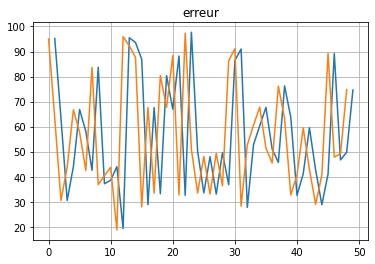

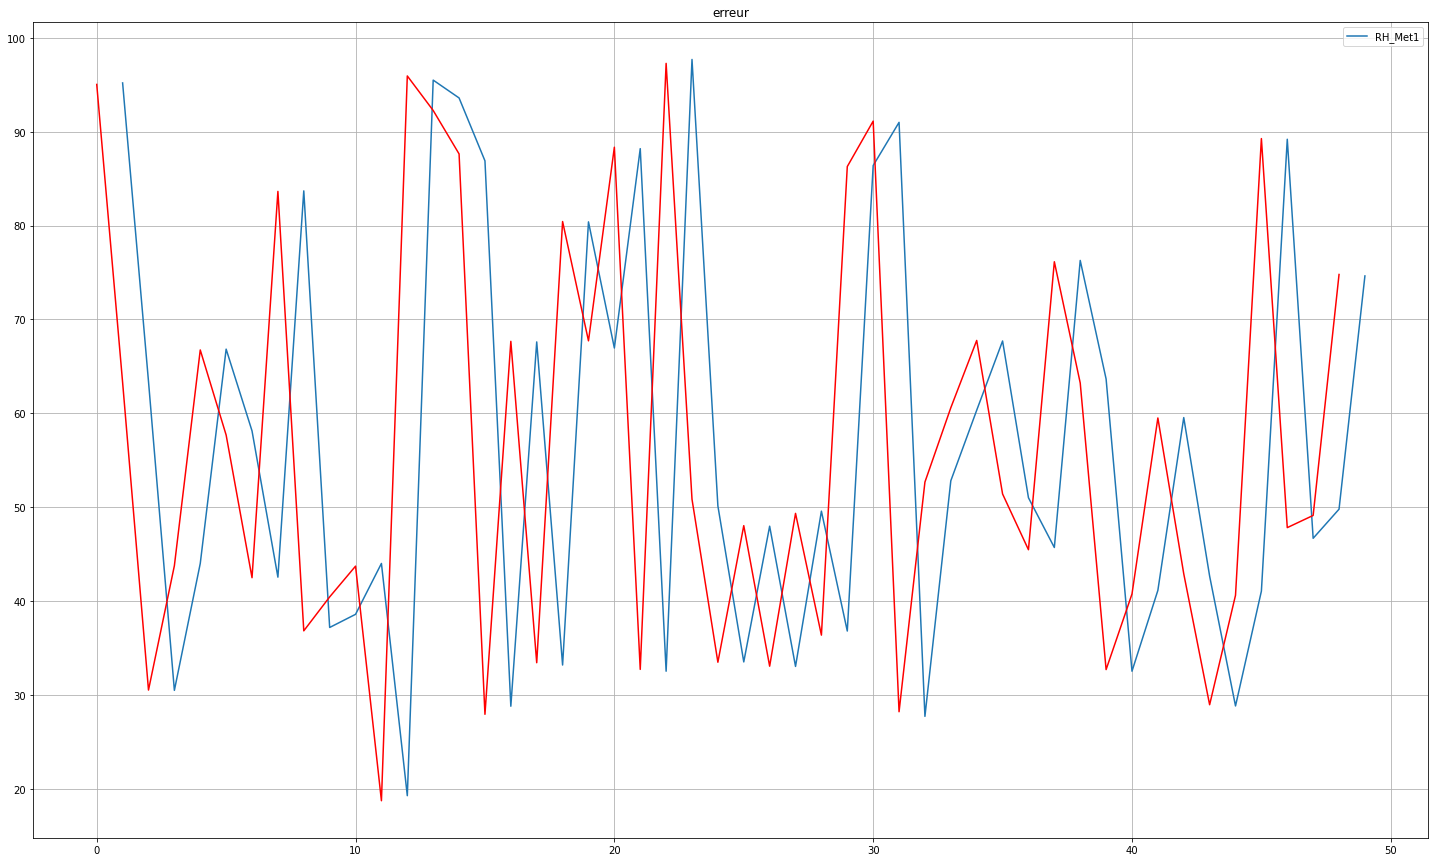

In [267]:
label=y_test.reset_index()
del label['index']
prediction = RH_model1.predict(X_test)
prediction=prediction.reshape(6842,1)
label=label[1:50]
prediction=prediction[1:50]
plt.plot(label)
plt.plot(prediction)
plt.title('erreur')
plt.grid(True)
plt.show()
label.plot(subplots=True, figsize=(25,15))
plt.plot(prediction,'r')
plt.title('erreur')
plt.grid(True)
plt.show()

### Grid Search

In [234]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [10, 20, 30, 40, 50, 60, 70, 90, 100]
}

# Create a base model
rf = RandomForestRegressor(random_state = 42)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2, return_train_score=True)

In [235]:
# Fit the grid search to the data
grid_search.fit(X_train,  y_train);

Fitting 3 folds for each of 648 candidates, totalling 1944 fits


C:\Users\AL799775\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


In [236]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 80,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 100}

In [237]:
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, X_test, y_test)

Model Performance
Average Error :  0.46
Accuracy : 99.11
Variance score : 1.00
Mean absolute error : 0.46
Residual sum of squares (MSE) : 0.51
R2-score : 1.00


C:\Users\AL799775\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\AL799775\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [238]:
print("Improvement of: %.2f" % np.divide(np.multiply (100,grid_accuracy - base_accuracy) , base_accuracy))

Improvement of: -0.05


## Train error vs Test error

C:\Users\AL799775\AppData\Local\Temp\ipykernel_13636\2664299821.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)
C:\Users\AL799775\AppData\Local\Temp\ipykernel_13636\2664299821.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)
C:\Users\AL799775\AppData\Local\Temp\ipykernel_13636\2664299821.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)
C:\Users\AL799775\AppData\Local\Temp\ipykernel_13636\2664299821.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_trai

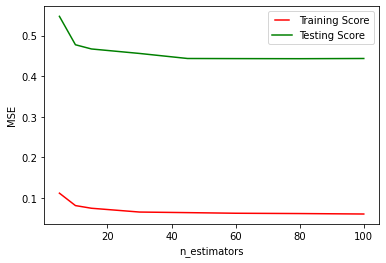

In [175]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D

train_results = []
test_results = []
list_nb_trees = [5, 10, 15, 30, 45, 60, 80, 100]

for nb_trees in list_nb_trees:
    rf = RandomForestRegressor(n_estimators=nb_trees)
    rf.fit(X_train, y_train)

    train_results.append(mean_squared_error(y_train, rf.predict(X_train)))
    test_results.append(mean_squared_error(y_test, rf.predict(X_test)))

line1, = plt.plot(list_nb_trees, train_results, color="r", label="Training Score")
line2, = plt.plot(list_nb_trees, test_results, color="g", label="Testing Score")

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('MSE')
plt.xlabel('n_estimators')
plt.show()

## Deploy model for batch prediction

In [246]:
RH_model1 = RandomForestRegressor(n_estimators= 100,min_samples_split=2,min_samples_leaf=2,max_features= 'auto',max_depth= 90,bootstrap= True)
RH_model1.fit(X_train,  y_train)

C:\Users\AL799775\AppData\Local\Temp\ipykernel_13636\351336001.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RH_model1.fit(X_train,  y_train)


RandomForestRegressor(max_depth=90, min_samples_leaf=2)

In [249]:
pip install joblib

Note: you may need to restart the kernel to use updated packages.


In [253]:
pip install virtualenv

In [251]:
pip install prefect

ERROR: Could not install packages due to an OSError: [WinError 5] Accès refusé: 'C:\\Users\\AL799775\\Anaconda3\\Lib\\site-packages\\pywin32_system32\\pywintypes39.dll'
Consider using the `--user` option or check the permissions.




  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
  Created wheel for pendulum: filename=pendulum-2.1.2-cp39-cp39-win_amd64.whl size=109762 sha256=92975dcee2062191f71c736fbceb81f7dbc3d9e6ca329b67f21581b547b5974a
  Stored in directory: c:\users\al799775\appdata\local\pip\cache\wheels\c9\c7\29\3cf0033406b18958d1a7b107c38be2405ef9c081b64a264fd5
Successfully built pendulum
  Attempting uninstall: pywin32
    Found existing installation: pywin32 302
    Uninstalling pywin32-302:
      Successfully uninstalled pywin32-302
  Rolling back uninstall of pywin32
  Moving to c:\users\al799775\anaconda3\lib\site-packages\__pycache__\pythoncom.cpython-39.pyc
   from C:\Users\AL799775\AppData\Local\Temp\pip-uninstall-122j7g0e\pythoncom.cpytho

In [283]:
pip install bentoml

  Using cached Jinja2-3.1.2-py3-none-any.whl (133 kB)
  Using cached uvicorn-0.20.0-py3-none-any.whl (56 kB)
Note: you may need to restart the kernel to use updated packages.  Downloading opentelemetry_api-1.14.0-py3-none-any.whl (50 kB)



ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
anaconda-project 0.10.2 requires ruamel-yaml, which is not installed.
jupyter-server 1.13.5 requires pywinpty<2; os_name == "nt", but you have pywinpty 2.0.2 which is incompatible.


  Using cached rich-13.2.0-py3-none-any.whl (238 kB)
  Using cached markdown_it_py-2.1.0-py3-none-any.whl (84 kB)
  Created wheel for python-multipart: filename=python_multipart-0.0.5-py3-none-any.whl size=31678 sha256=87506d7f65928501354f0467155c3a9dd39d36c8d2b72dd4198e9001d428b5f3
  Stored in directory: c:\users\al799775\appdata\local\pip\cache\wheels\fe\04\d1\a10661cc45f03c3cecda50deb2d2c22f57b4e84a75b2a5987e
Successfully built python-multipart
  Attempting uninstall: pip
    Found existing installation: pip 21.2.4
    Uninstalling pip-21.2.4:
      Successfully uninstalled pip-21.2.4
  Attempting uninstall: Jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3


Une phase d’amélioration de performance et d’exploration d’autres approches
pour la correction des biais de mesure des capteurs bas coût...

In [21]:
import joblib

In [22]:
#Saving the machine learning model to a file
joblib.dump(RH_model, "RH_model.pkl")

['RH_model.pkl']

In [23]:
model = joblib.load('RH_model.pkl')
y_predict = model.predict(X_test)

In [24]:
y_predict

array([71.1629, 95.015 , 63.2957, ..., 40.0722, 58.9972, 35.8082])

In [113]:
def test_variable(rh_xaria, rh_cabri, rh_gba, rh_met2, t, p):
    if (3>=rh_xaria or rh_xaria>=100) and 4<=(RH_Met2 and RH_Cabri and RH_Gba)<=100 and -20<=T_Met1<=50 and 900<=P_Met1<=1100  :
        rh_xaria='NaN'  
    if (3>=rh_Cabri or rh_Cabri>=100) and 4<=(RH_Met2 and RH_xaria and RH_Gba)<=100 and -20<=T_Met1<=50 and 900<=P_Met1<=1100  :
        rh_Cabri='NaN'  
    if (3>=rh_Met2 or rh_Met2>=100) and 4<=(RH_xaria and RH_Cabri and RH_Gba)<=100 and -20<=T_Met1<=50 and 900<=P_Met1<=1100  :
        rh_Met2='NaN'  
    if (3>=rh_Gba or rh_Gba>=100) and 4<=(RH_Met2 and  RH_Cabri and RH_xaria)<=100 and -20<=T_Met1<=50 and 900<=P_Met1<=1100  :
        rh_Gba='NaN'          
    if (-30>=T_Met1 or T_Met1>=60) and 4<=(RH_Met2 and rh_xaria and RH_Cabri and RH_Gba)<=100 and 900<=P_Met1<=1100  :
        T_Met1='NaN'                 
    if (700>=P_Met1 or P_Met1>=1400) and 4<=(RH_Met2 and rh_xaria and RH_Cabri and RH_Gba)<=100 and -20<=T_Met1<=50 :
        P_Met1='NaN'          

    ar = numpy.array([[rh_xaria, rh_cabri, rh_gba, rh_met2, t, p]])
    df_rh = pandas.DataFrame(ar, columns = [RH_Xaria, RH_Cabri, RH_Gba, RH_Met2, T, P])

In [114]:
test_rh(0)

'NaN'

In [ ]:
def predict_rh(df_rh):
    
    if 4<=(RH_Met2 and RH_Xaria and RH_Cabri and RH_Gba)<=100 and -20<=T_Met1<=50 and 900<=P_Met1<=1100 :
        return model1.predict(data)
    x, y = df_RH_met1.iloc[:, [0,1,2,4,6,9]], df_RH_met1.iloc[:, [-1]]
    elif 4<=(RH_Xaria and RH_Cabri and RH_Gba)<=100 and -20<=T_Met1<=50 and 900<=P_Met1<=1100 :
        return model2.predict(data)
        x, y = df_RH_met1.iloc[:, [0,1,2,6,9]], df_RH_met1.iloc[:, [-1]]
    elif 4<=(RH_Met2 and RH_Cabri and RH_Gba)<=100 and -20<=T_Met1<=50 and 900<=P_Met1<=1100 :
        return model3.predict(data)
    x, y = df_RH_met1.iloc[:, [1,2,4,6,9]], df_RH_met1.iloc[:, [-1]]
    elif 4<=(RH_Met2 and RH_Xaria and  RH_Gba)<=100 and -20<=T_Met1<=50 and 900<=P_Met1<=1100 :
        return model4.predict(data)
    x, y = df_RH_met1.iloc[:, [0,2,4,6,9]], df_RH_met1.iloc[:, [-1]]
    elif 4<=(RH_Met2 and RH_Xaria and RH_Cabri)<=100 and -20<=T_Met1<=50 and 900<=P_Met1<=1100 :
        return model5.predict(data)
    x, y = df_RH_met1.iloc[:, [0,1,4,6,9]], df_RH_met1.iloc[:, [-1]]
    elif 4<=(RH_Met2 and RH_Xaria and RH_Cabri and RH_Gba)<=100 and 900<=P_Met1<=1100 :
        return model6.predict(data)
    x, y = df_RH_met1.iloc[:, [0,1,2,4,9]], df_RH_met1.iloc[:, [-1]]
    elif 4<=(RH_Met2 and RH_Xaria and RH_Cabri and RH_Gba)<=100 and -20<=T_Met1<=50 :
        return model7.predict(data)
        x, y = df_RH_met1.iloc[:, [0,1,2,4,6]], df_RH_met1.iloc[:, [-1]]
    elif 4<=(RH_Cabri and RH_Gba)<=100 and -20<=T_Met1<=50 and 900<=P_Met1<=1100 :
        return model8.predict(data)
    x, y = df_RH_met1.iloc[:, [1,2,6,9]], df_RH_met1.iloc[:, [-1]]
    elif 4<=(RH_Xaria and RH_Gba)<=100 and -20<=T_Met1<=50 and 900<=P_Met1<=1100 :
        return model9.predict(data)
        x, y = df_RH_met1.iloc[:, [0,2,6,9]], df_RH_met1.iloc[:, [-1]]
    elif 4<=(RH_Xaria and RH_Cabri)<=100 and -20<=T_Met1<=50 and 900<=P_Met1<=1100 :
        return model10.predict(data)
    x, y = df_RH_met1.iloc[:, [0,1,6,9]], df_RH_met1.iloc[:, [-1]]    
    elif 4<=(RH_Xaria and RH_Cabri and RH_Gba)<=100 and 900<=P_Met1<=1100 :
        return model11.predict(data)
    x, y = df_RH_met1.iloc[:, [0,1,2,9]], df_RH_met1.iloc[:, [-1]]
    elif 4<=(RH_Xaria and RH_Cabri and RH_Gba)<=100 and -20<=T_Met1<=50 :
        return model12.predict(data)
    x, y = df_RH_met1.iloc[:, [0,1,2,6]], df_RH_met1.iloc[:, [-1]]
    elif 4<=(RH_Met2 and RH_Gba)<=100 and -20<=T_Met1<=50 and 900<=P_Met1<=1100 :
        return model13.predict(data)
    x, y = df_RH_met1.iloc[:, [2,4,6,9]], df_RH_met1.iloc[:, [-1]]
    elif 4<=(RH_Met2 and RH_Cabri)<=100 and -20<=T_Met1<=50 and 900<=P_Met1<=1100 :
        return model14.predict(data)
    x, y = df_RH_met1.iloc[:, [1,4,6,9]], df_RH_met1.iloc[:, [-1]]
    elif 4<=(RH_Met2 and RH_Cabri and RH_Gba)<=100 and 900<=P_Met1<=1100 :
        return model15.predict(data)
    x, y = df_RH_met1.iloc[:, [1,2,4,9]], df_RH_met1.iloc[:, [-1]]
    elif 4<=(RH_Met2 and RH_Cabri and RH_Gba)<=100 and -20<=T_Met1<=50 :
        return model16.predict(data)
    x, y = df_RH_met1.iloc[:, [1,2,4,6]], df_RH_met1.iloc[:, [-1]]
    elif 4<=(RH_Met2 and RH_Xaria)<=100 and -20<=T_Met1<=50 and 900<=P_Met1<=1100 :
        return model17.predict(data)
    x, y = df_RH_met1.iloc[:, [0,4,6,9]], df_RH_met1.iloc[:, [-1]]
    elif 4<=(RH_Met2 and RH_Xaria and RH_Gba)<=100 and 900<=P_Met1<=1100 :
        return model18.predict(data)
    x, y = df_RH_met1.iloc[:, [0,2,4,9]], df_RH_met1.iloc[:, [-1]]
    elif 4<=(RH_Met2 and RH_Xaria and RH_Gba)<=100 and -20<=T_Met1<=50 :
        return model19.predict(data)
    x, y = df_RH_met1.iloc[:, [0,2,4,6]], df_RH_met1.iloc[:, [-1]]
    elif 4<=(RH_Met2 and RH_Xaria and RH_Cabri)<=100 and 900<=P_Met1<=1100 :
        return model20.predict(data)
    x, y = df_RH_met1.iloc[:, [0,1,4,9]], df_RH_met1.iloc[:, [-1]]
    elif 4<=(RH_Met2 and RH_Xaria and RH_Cabri)<=100 and -20<=T_Met1<=50 :
        return model21.predict(data)
    x, y = df_RH_met1.iloc[:, [0,1,4,6]], df_RH_met1.iloc[:, [-1]]
    elif 4<=(RH_Met2 and RH_Xaria and RH_Cabri and RH_Gba)<=100 :
        return model22.predict(data)
    x, y = df_RH_met1.iloc[:, [0,1,2,4]], df_RH_met1.iloc[:, [-1]]
    elif 4<=(RH_Gba)<=100 and -20<=T_Met1<=50 and 900<=P_Met1<=1100 :
        return model23.predict(data)
    x, y = df_RH_met1.iloc[:, [2,6,9]], df_RH_met1.iloc[:, [-1]]
    elif 4<=(RH_Cabri)<=100 and -20<=T_Met1<=50 and 900<=P_Met1<=1100 :
        return model24.predict(data)
    x, y = df_RH_met1.iloc[:, [1,6,9]], df_RH_met1.iloc[:, [-1]]
    elif 4<=(RH_Cabri and RH_Gba)<=100 and 900<=P_Met1<=1100 :
        return model25.predict(data)
    x, y = df_RH_met1.iloc[:, [1,2,9]], df_RH_met1.iloc[:, [-1]]
    elif 4<=(RH_Cabri and RH_Gba)<=100 and -20<=T_Met1<=50 :
        return model26.predict(data)
    x, y = df_RH_met1.iloc[:, [1,2,6]], df_RH_met1.iloc[:, [-1]]
    elif 4<=(RH_Xaria)<=100 and -20<=T_Met1<=50 and 900<=P_Met1<=1100 :
        return model27.predict(data)
    x, y = df_RH_met1.iloc[:, [0,6,9]], df_RH_met1.iloc[:, [-1]]
    elif 4<=(RH_Xaria and RH_Gba)<=100 and 900<=P_Met1<=1100 :
        return model28.predict(data)
    x, y = df_RH_met1.iloc[:, [0,2,9]], df_RH_met1.iloc[:, [-1]]
    elif 4<=(RH_Xaria and RH_Gba)<=100 and -20<=T_Met1<=50 :
        return model29.predict(data)
    x, y = df_RH_met1.iloc[:, [0,2,6]], df_RH_met1.iloc[:, [-1]]
    elif 4<=(RH_Xaria and RH_Cabri)<=100 and 900<=P_Met1<=1100 :
        return model30.predict(data)
    x, y = df_RH_met1.iloc[:, [0,1,9]], df_RH_met1.iloc[:, [-1]]
    elif 4<=(RH_Xaria and RH_Cabri)<=100 and -20<=T_Met1<=50 :
        return model31.predict(data)
    x, y = df_RH_met1.iloc[:, [0,1,6]], df_RH_met1.iloc[:, [-1]]
    elif 4<=(RH_Xaria and RH_Cabri and RH_Gba)<=100 :
        return model32.predict(data)
    x, y = df_RH_met1.iloc[:, [0,1,2]], df_RH_met1.iloc[:, [-1]]
    elif 4<=(RH_Met2)<=100 and -20<=T_Met1<=50 and 900<=P_Met1<=1100 :
        return model33.predict(data)
    x, y = df_RH_met1.iloc[:, [4,1,2]], df_RH_met1.iloc[:, [-1]]
    elif 4<=(RH_Met2 and RH_Gba)<=100 and 900<=P_Met1<=1100 :
        return model34.predict(data)
    x, y = df_RH_met1.iloc[:, [2,4,9]], df_RH_met1.iloc[:, [-1]]
    elif 4<=(RH_Met2 and RH_Gba)<=100 and -20<=T_Met1<=50 :
        return model35.predict(data)
    x, y = df_RH_met1.iloc[:, [2,4,6]], df_RH_met1.iloc[:, [-1]]
    elif 4<=(RH_Met2 and RH_Cabri)<=100 and 900<=P_Met1<=1100 :
        return model36.predict(data)
    x, y = df_RH_met1.iloc[:, [1,4,9]], df_RH_met1.iloc[:, [-1]]
    elif 4<=(RH_Met2 and RH_Cabri)<=100 and -20<=T_Met1<=50 :
        return model37.predict(data)
    x, y = df_RH_met1.iloc[:, [1,4,6]], df_RH_met1.iloc[:, [-1]]
    elif 4<=(RH_Met2 and RH_Cabri and RH_Gba)<=100 :
        return model38.predict(data)
    x, y = df_RH_met1.iloc[:, [1,2,4]], df_RH_met1.iloc[:, [-1]]
    elif 4<=(RH_Met2 and RH_Xaria)<=100 and 900<=P_Met1<=1100 :
        return model39.predict(data)
    x, y = df_RH_met1.iloc[:, [0,4,9]], df_RH_met1.iloc[:, [-1]]
    elif 4<=(RH_Met2 and RH_Xaria)<=100 and -20<=T_Met1<=50 :
        return model40.predict(data)
    x, y = df_RH_met1.iloc[:, [0,4,6]], df_RH_met1.iloc[:, [-1]]
    elif 4<=(RH_Met2 and RH_Xaria and RH_Cabri)<=100 :
        return model41.predict(data)
    x, y = df_RH_met1.iloc[:, [0,1,4]], df_RH_met1.iloc[:, [-1]]
    elif -20<=T_Met1<=50 and 900<=P_Met1<=1100 :
        return model42.predict(data)
    x, y = df_RH_met1.iloc[:, [6,9]], df_RH_met1.iloc[:, [-1]]
    elif 4<=(RH_Gba)<=100 and 900<=P_Met1<=1100 :
        return model43.predict(data)
    x, y = df_RH_met1.iloc[:, [2,9]], df_RH_met1.iloc[:, [-1]]
    elif 4<=(RH_Gba)<=100 and -20<=T_Met1<=50 :
        return model44.predict(data)
    x, y = df_RH_met1.iloc[:, [2,6]], df_RH_met1.iloc[:, [-1]]
    elif 4<=(RH_Xaria)<=100 and 900<=P_Met1<=1100 :
        return model45.predict(data)
    x, y = df_RH_met1.iloc[:, [0,9]], df_RH_met1.iloc[:, [-1]]
    elif 4<=(RH_Xaria)<=100 and -20<=T_Met1<=50 :
        return model46.predict(data)
    x, y = df_RH_met1.iloc[:, [0,6]], df_RH_met1.iloc[:, [-1]]
    elif 4<=(RH_Xaria and RH_Cabri)<=100 :
        return model47.predict(data)
    x, y = df_RH_met1.iloc[:, [0,1]], df_RH_met1.iloc[:, [-1]]
    elif 4<=(RH_Met2)<=100 and 900<=P_Met1<=1100 :
        return model48.predict(data)
    x, y = df_RH_met1.iloc[:, [4,9]], df_RH_met1.iloc[:, [-1]]
    elif 4<=(RH_Met2)<=100 and -20<=T_Met1<=50 :
        return model49.predict(data)
    x, y = df_RH_met1.iloc[:, [4,6]], df_RH_met1.iloc[:, [-1]]
    elif 4<=(RH_Met2 and RH_Cabri)<=100 :
        return model50.predict(data)
    x, y = df_RH_met1.iloc[:, [1,4]], df_RH_met1.iloc[:, [-1]]
    elif 4<=(RH_Met2 and RH_Xaria)<=100 and :
        return model51.predict(data)
    x, y = df_RH_met1.iloc[:, [0,4]], df_RH_met1.iloc[:, [-1]]
    elif 4<=(RH_Met2)<=100 :
        return model52.predict(data)
    x, y = df_RH_met1.iloc[:, [4]], df_RH_met1.iloc[:, [-1]]
    elif 4<=(RH_Xaria)<=100 :
        return model53.predict(data)
    x, y = df_RH_met1.iloc[:, [0]], df_RH_met1.iloc[:, [-1]]
    elif 4<=(RH_Cabri)<=100 :
        return model54.predict(data)
    x, y = df_RH_met1.iloc[:, [1]], df_RH_met1.iloc[:, [-1]]
    elif 4<=(RH_Gba)<=100 :
        return model55.predict(data)
    x, y = df_RH_met1.iloc[:, [2]], df_RH_met1.iloc[:, [-1]]
    else :
        return (75)
